In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import normal_ad
from sklearn.metrics import r2_score, max_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import plotly.graph_objects as go 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#pip install covid19dh 

In [ ]:
pip install --upgrade covid19dh

In [ ]:
from covid19dh import covid19
x, src = covid19() 

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


# Zapoznanie z danymi

In [ ]:
print("x: {}".format(type(x)))
print("src: {}".format(type(src)))

x: <class 'pandas.core.frame.DataFrame'>
src: <class 'pandas.core.frame.DataFrame'>


In [ ]:
x.head()

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
37086,0094b645,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
37087,0094b645,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
37088,0094b645,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
37089,0094b645,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA
37090,0094b645,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LCA,LC,662.0,XCD,NaN,NaN,NaN,LC,NaN,LCA


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190553 entries, 37086 to 80962
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   id                                   190553 non-null  object        
 1   date                                 190553 non-null  datetime64[ns]
 2   confirmed                            174078 non-null  float64       
 3   deaths                               158023 non-null  float64       
 4   recovered                            70382 non-null   float64       
 5   tests                                78447 non-null   float64       
 6   vaccines                             48517 non-null   float64       
 7   people_vaccinated                    46155 non-null   float64       
 8   people_fully_vaccinated              43799 non-null   float64       
 9   hosp                                 32393 non-null   float64      

In [ ]:
def percent_missing(df):
  perc_missing = pd.DataFrame({'Percent of missing values [%]' : np.round(100*df.isnull().sum()/df.shape[0], decimals=2)})
  print(perc_missing)

In [ ]:
percent_missing(x)

                                     Percent of missing values [%]
id                                                            0.00
date                                                          0.00
confirmed                                                     8.65
deaths                                                       17.07
recovered                                                    63.06
tests                                                        58.83
vaccines                                                     74.54
people_vaccinated                                            75.78
people_fully_vaccinated                                      77.01
hosp                                                         83.00
icu                                                          84.25
vent                                                         97.09
school_closing                                               19.93
workplace_closing                                            1

In [ ]:
x.describe()

,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,...,economic_support_index,administrative_area_level,administrative_area_level_2,administrative_area_level_3,latitude,longitude,population,iso_numeric,key_local,key_nuts
count,1.740780e+05,158023.000000,7.038200e+04,7.844700e+04,4.851700e+04,4.615500e+04,4.379900e+04,32393.000000,30020.000000,5539.000000,...,152412.000000,190553.0,0.0,0.0,186779.000000,186779.000000,1.897090e+05,189311.000000,0.0,0.0
mean,7.565282e+05,14978.654139,5.632183e+05,1.939093e+07,4.871457e+07,1.818519e+07,1.480624e+07,6151.051215,783.957761,518.935548,...,38.222548,1.0,NaN,NaN,17.924236,14.769652,3.366901e+07,432.078416,NaN,NaN
std,3.721963e+06,62305.741841,2.265139e+06,7.935735e+07,2.425906e+08,7.595296e+07,6.284262e+07,35475.103965,2406.312855,714.659018,...,32.644819,0.0,NaN,NaN,24.084475,70.815230,1.347768e+08,250.981639,NaN,NaN
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,1.0,NaN,NaN,-51.750000,-176.200000,5.000000e+01,4.000000,NaN,NaN
25%,2.391250e+03,69.000000,2.936000e+03,3.254505e+05,3.107930e+05,1.840865e+05,1.294505e+05,98.000000,20.000000,35.000000,...,0.000000,1.0,NaN,NaN,3.919300,-24.000000,5.437670e+05,218.000000,NaN,NaN
50%,2.455000e+04,610.000000,2.647850e+04,1.836090e+06,2.914325e+06,1.729417e+06,1.295536e+06,660.000000,110.000000,185.000000,...,37.500000,1.0,NaN,NaN,16.995972,17.873900,5.750433e+06,430.000000,NaN,NaN
75%,2.491882e+05,5258.000000,2.205368e+05,9.188504e+06,1.636180e+07,8.319855e+06,6.911698e+06,2947.000000,539.000000,789.500000,...,62.500000,1.0,NaN,NaN,39.000000,47.576900,2.167000e+07,643.000000,NaN,NaN
max,8.236776e+07,998279.000000,3.097475e+07,9.214000e+09,3.360050e+09,1.287195e+09,1.252592e+09,875258.000000,28891.000000,4077.000000,...,100.000000,1.0,NaN,NaN,64.963100,178.065000,1.392730e+09,894.000000,NaN,NaN


In [ ]:
src.head()

,iso_alpha_3,administrative_area_level,data_type,url,title,year,bibtype,author,institution,textVersion
0,ABW,1,latitude,https://www.cia.gov/library/publications/the-w...,CIA - Central Intelligence Agency,2020,NaN,NaN,NaN,NaN
1,ABW,1,longitude,https://www.cia.gov/library/publications/the-w...,CIA - Central Intelligence Agency,2020,NaN,NaN,NaN,NaN
742,ABW,1,deaths,https://github.com/CSSEGISandData/COVID-19,Johns Hopkins Center for Systems Science and E...,2020,NaN,NaN,NaN,NaN
743,ABW,1,confirmed,https://github.com/CSSEGISandData/COVID-19,Johns Hopkins Center for Systems Science and E...,2020,NaN,NaN,NaN,NaN
747,ABW,1,vaccines,https://github.com/owid/covid-19-data,Our World in Data,2020,NaN,NaN,NaN,NaN


In [ ]:
src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3701 entries, 0 to 761
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   iso_alpha_3                3701 non-null   object
 1   administrative_area_level  3701 non-null   object
 2   data_type                  3701 non-null   object
 3   url                        3701 non-null   object
 4   title                      3701 non-null   object
 5   year                       3701 non-null   object
 6   bibtype                    0 non-null      object
 7   author                     1864 non-null   object
 8   institution                1859 non-null   object
 9   textVersion                1859 non-null   object
dtypes: object(10)
memory usage: 318.1+ KB


Ramka danych 'x' zawiera dane covidowe, natomiast ramka 'src' zawiera odniesienia do danych, linki itp.

# Analiza Lokalna 

### Podstawowa eksploracja danych

Do lokalnej analizy zjawiska wybrałam Norwegię, ze względu na stosunkowo dużą liczbę rekordów do analizy oraz niewielką liczbę brakujących wartości (dobre udokumentowanie zjawiska na terenie kraju).

In [ ]:
y = x.groupby(['iso_alpha_2'])['id'].count().sort_values(ascending=False)
y

iso_alpha_2
MX    865
TH    863
CN    862
AR    862
TW    852
     ... 
NU    266
AS    234
TM    190
TK    114
PN     85
Name: id, Length: 232, dtype: int64

In [ ]:
y.loc['NO']

844

In [ ]:
x_no, src_no = covid19("NO") 
x_no.reset_index(drop=True, inplace=True)

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


In [ ]:
x_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   id                                   844 non-null    object        
 1   date                                 844 non-null    datetime64[ns]
 2   confirmed                            809 non-null    float64       
 3   deaths                               792 non-null    float64       
 4   recovered                            17 non-null     float64       
 5   tests                                768 non-null    float64       
 6   vaccines                             518 non-null    float64       
 7   people_vaccinated                    518 non-null    float64       
 8   people_fully_vaccinated              492 non-null    float64       
 9   hosp                                 642 non-null    float64       
 10  icu           

In [ ]:
percent_missing(x_no)

                                     Percent of missing values [%]
id                                                            0.00
date                                                          0.00
confirmed                                                     4.15
deaths                                                        6.16
recovered                                                    97.99
tests                                                         9.00
vaccines                                                     38.63
people_vaccinated                                            38.63
people_fully_vaccinated                                      41.71
hosp                                                         23.93
icu                                                         100.00
vent                                                        100.00
school_closing                                                0.83
workplace_closing                                             

### Eliminacja zmiennych

In [ ]:
if_significant = ['school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection',
       'government_response_index', 'stringency_index',
       'containment_health_index', 'economic_support_index',
       'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'population', 'iso_alpha_3', 'iso_alpha_2',
       'iso_numeric', 'iso_currency', 'key_local', 'key_google_mobility',
       'key_apple_mobility', 'key_jhu_csse', 'key_nuts', 'key_gadm', 'hosp']

for col in if_significant:
    print("{:40} : {}".format(col, x_no[col].unique()))

school_closing                           : [ 0.  3.  2.  1. -2. nan]
workplace_closing                        : [ 0.  1.  2. -2. -3. -1. nan]
cancel_events                            : [ 0.  2. -2.  1. -1. nan]
gatherings_restrictions                  : [ 0.  2.  4.  3. -4. -3. nan]
transport_closing                        : [ 0.  1. nan]
stay_home_restrictions                   : [ 0.  1. nan]
internal_movement_restrictions           : [ 0. -2.  2.  1. nan]
international_movement_restrictions      : [ 0.  2.  4.  3.  1. nan]
information_campaigns                    : [ 0.  2. nan]
testing_policy                           : [ 0.  1.  2.  3. nan]
contact_tracing                          : [ 0.  1.  2. nan]
facial_coverings                         : [ 0.  1. -1. -2.  2. nan]
vaccination_policy                       : [ 0.  1.  2.  3.  4.  5. nan]
elderly_people_protection                : [ 0.  2. -3. -2. -1. nan]
government_response_index                : [ 0.    6.25  8.33 13.54 16.67 

In [ ]:
x_no.nunique()

id                                       1
date                                   844
confirmed                              802
deaths                                 276
recovered                               17
tests                                  768
vaccines                               518
people_vaccinated                      515
people_fully_vaccinated                487
hosp                                   287
icu                                      0
vent                                     0
school_closing                           5
workplace_closing                        6
cancel_events                            5
gatherings_restrictions                  6
transport_closing                        2
stay_home_restrictions                   2
internal_movement_restrictions           4
international_movement_restrictions      5
information_campaigns                    2
testing_policy                           4
contact_tracing                          3
facial_cove

**Obserwacje:**
- Do analizy użyję ograniczonego zbioru zmiennych. 
- Zmienne
  >['date', 'confirmed', 'deaths', 'recovered', 'tests', 'vaccines', 'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent'] 

uważam za istotne. 
- Przy czym dla Norwgii zmienne 'icu' i 'vent' (oznaczające liczbę pacjentów leczonych na Oddziale intensywnej terapii oraz liczbę osób wymagających respiratorów) mają 100% brakujących danych, zatem rezygnuję z nich w analizie.
- Po wypisaniu unikatowych wartości dla każdej z kolumn od razu nasuwa się wniosek, iż kolumny o nazwie rozpoczynającej się od 'key', 'iso' oraz 'administrative', nie mają znaczenia w analizie zgonów. Podobnie 'latitude' i 'longitude'
- Wartości pozostałych zmiennych wyrażone są w stopniach skali nasilenia czynnika (?)
- Zmienne 
  >['government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index']

to indeksy, które informują zbiorczo o działaniach podejmowanych na terenie kraju, w celu zatrzymania rozprzetrzeniania wirusa, pomocy ekonomicznej, w zakresie polityki szczepień itd. Indeksy te mogą zastąpić poszczególne zmienne tj. 'cancel_events', 'stay_home_restrictions'.

In [ ]:
not_significant = ['id', 'icu', 'vent', 'school_closing',
       'workplace_closing', 'cancel_events', 'gatherings_restrictions',
       'transport_closing', 'stay_home_restrictions',
       'internal_movement_restrictions', 'international_movement_restrictions',
       'information_campaigns', 'testing_policy', 'contact_tracing',
       'facial_coverings', 'vaccination_policy', 'elderly_people_protection',
       'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'iso_alpha_3', 'iso_alpha_2',
       'iso_numeric', 'iso_currency', 'key_local', 'key_google_mobility',
       'key_apple_mobility', 'key_jhu_csse', 'key_nuts', 'key_gadm']
x_no.drop(not_significant, axis=1, inplace=True)

In [ ]:
percent_missing(x_no)

                           Percent of missing values [%]
date                                                0.00
confirmed                                           4.15
deaths                                              6.16
recovered                                          97.99
tests                                               9.00
vaccines                                           38.63
people_vaccinated                                  38.63
people_fully_vaccinated                            41.71
hosp                                               23.93
government_response_index                           0.83
stringency_index                                    0.83
containment_health_index                            0.83
economic_support_index                              0.83
population                                          0.00


In [ ]:
x_no.population.unique()

array([5311916.])

In [ ]:
population_no = x_no.loc[0, 'population']
x_no.drop('population', axis=1, inplace=True)

### Brakujące wartości

In [ ]:
print('Start date: {}'.format(x_no['date'].sort_values().head(1)))
print('End date: {}'.format(x_no['date'].sort_values(ascending=False).head(1)))

Start date: 0   2020-01-22
Name: date, dtype: datetime64[ns]
End date: 843   2022-05-14
Name: date, dtype: datetime64[ns]


Zmienne ['vaccines', 'people_vaccinated', 'people_fully_vaccinated']:

In [ ]:
x_no[x_no.vaccines.notnull()][['date', 'vaccines']]

,date,vaccines
315,2020-12-02,0.0
321,2020-12-08,5.0
322,2020-12-09,6.0
323,2020-12-10,7.0
324,2020-12-11,11.0
...,...,...
837,2022-05-08,11304667.0
838,2022-05-09,11305398.0
839,2022-05-10,11306538.0
840,2022-05-11,11308081.0


In [ ]:
x_no.iloc[321:, :].vaccines.isnull().sum()

6

 **Obserwacje:**
- Pierwsza wartość dla zmiennej 'vaccines', nie będąca brakującą wartością, ani zerem, występuje dopiero w wierszu o numerze 321.
- Później dla zmiennej zdarzają się brakujące wartości, ale jest ich pomijalnie niewiele.
- Można wysnuć wniosek, że od dnia (2020-12-08) wprowadzono pierwsze (próbne?) szczepienia przeciw COVID-19.
- https://en.wikipedia.org/wiki/COVID-19_vaccination_in_Norway
Szczepionkę zaaprobowano 2020-12-21, wprowadzono 2020-12-27
- Wiersze z brakującymi wartościami są użyteczną informacją, zamiast je usuwać brakujące wartości do dnia 2020-12-27 uzupełniam wartością 0, resztę usuwam
- ze względu na analogię wartości dla zmiennych 'vaccines', 'people_vaccinated', 'people_fully_vaccinated' uzupełniam 0 te same wiersze 

In [ ]:
x_no.loc[0:340, ['vaccines', 'people_vaccinated', 'people_fully_vaccinated']] = 0.0
x_no = x_no[x_no['vaccines'].notnull()]

In [ ]:
for val in ['vaccines', 'people_vaccinated', 'people_fully_vaccinated']:
  print('{:25} : {}'.format(val, x_no[val].isnull().sum()))

vaccines                  : 0
people_vaccinated         : 0
people_fully_vaccinated   : 9


In [ ]:
x_no[x_no.people_fully_vaccinated.isnull()][['date', 'people_fully_vaccinated']]

,date,people_fully_vaccinated
341,2020-12-28,NaN
342,2020-12-29,NaN
343,2020-12-30,NaN
344,2020-12-31,NaN
345,2021-01-01,NaN
346,2021-01-02,NaN
347,2021-01-03,NaN
348,2021-01-04,NaN
349,2021-01-05,NaN


*Being fully vaccinated means that you have finished your vaccine, whether that's one dose or two, and two weeks have passed. You do need two weeks for your immune system to mount its full response. You are then considered fully immunized.*

- pierwsza niezerowa wartość 'vaccines' (pierwsza próbna szczepionka?) dla 2020-12-08
- pierwsza zatwierdzona szczepionka 2020-12-27
- zatem można uznać, że brakujące wartości zmiennej 'people_fully_vaccinated' oznaczają, że osoby nie kwalifikowały się do przyjęcia drugiej dawki ze względu na okres przerwy między dawkami
- brakujące wartości uzupełnię zerami

In [ ]:
x_no.loc[341:349, 'people_fully_vaccinated'] = 0.0
x_no.people_fully_vaccinated.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


0

Zmienna 'deaths':

In [ ]:
first_valid_deaths = x_no.deaths.first_valid_index()

print('Indeks pierwszej niezerowej wartości (od 0): {}'.format(first_valid_deaths))
print('Wcześniej brakujących wartości: {}'.format(x_no.loc[0:first_valid_deaths-1, 'deaths'].isnull().sum()))
print('Kolejna wartość dla zmiennej "deaths": {}'.format((x_no.loc[first_valid_deaths, 'deaths'])))

Indeks pierwszej niezerowej wartości (od 0): 52
Wcześniej brakujących wartości: 52
Kolejna wartość dla zmiennej "deaths": 3.0


- W początkowych miesiącach pandemii brak wartości dla zmiennej 'deaths', a kolejna wartość to 3
- Zatem sensowne jest wypełnić początkowe wartości zerem.

In [ ]:
x_no.loc[0:first_valid_deaths-1, 'deaths'] = 0.0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
print('{} : {}'.format('deaths', x_no['deaths'].isnull().sum()))

deaths : 0


Zmienna 'tests':

In [ ]:
first_valid_tests = x_no.tests.first_valid_index()

print('Indeks pierwszej niezerowej wartości (od 0): {}'.format(first_valid_tests))
print('Wcześniej brakujących wartości: {}'.format(x_no.loc[0:first_valid_tests-1, 'tests'].isnull().sum()))
print('Kolejna wartość dla zmiennej "tests": {}'.format((x_no.loc[first_valid_tests, 'tests'])))

Indeks pierwszej niezerowej wartości (od 0): 70
Wcześniej brakujących wartości: 70
Kolejna wartość dla zmiennej "tests": 3934.0


In [ ]:
x_no.loc[0:first_valid_tests-1, 'tests'] = 0.0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
print('{} : {}'.format('tests', x_no['tests'].isnull().sum()))

tests : 4


In [ ]:
x_no[x_no.tests.isnull()][['date', 'tests']]

,date,tests
129,2020-05-30,NaN
839,2022-05-10,NaN
840,2022-05-11,NaN
841,2022-05-12,NaN


Brakujące pojedyncze wartości, zatem można je interpolować.

In [ ]:
x_no.tests.interpolate(inplace=True)

In [ ]:
print('{} : {}'.format('tests', x_no['tests'].isnull().sum()))

tests : 0


Zmienna 'confirmed':

In [ ]:
first_valid_confirmed = x_no.confirmed.first_valid_index()

print('Indeks pierwszej niezerowej wartości (od 0): {}'.format(first_valid_confirmed))
print('Wcześniej brakujących wartości: {}'.format(x_no.loc[0:first_valid_confirmed-1, 'confirmed'].isnull().sum()))
print('Kolejna wartość dla zmiennej "confirmed": {}'.format((x_no.loc[first_valid_confirmed, 'confirmed'])))

Indeks pierwszej niezerowej wartości (od 0): 35
Wcześniej brakujących wartości: 35
Kolejna wartość dla zmiennej "confirmed": 1.0


In [ ]:
x_no.loc[0:first_valid_confirmed-1, 'confirmed'] = 0.0

In [ ]:
print('{} : {}'.format('confirmed', x_no['confirmed'].isnull().sum()))

confirmed : 0


Zmienna 'recovered':

In [ ]:
print('{} : {}'.format('recovered', x_no['recovered'].notnull().sum()))

recovered : 17


- Blisko 100% brakujących wartości dla zmiennej 'recovered'. 
- Dane są zbierane w odstępach wielu dni
- Danych jest niewiele oraz występują tylko dla 8 miesięcy pierwszego roku pandemii, ponadto kończą się przed datą wprowadzenia szczepionki
- Zatem rezygnuję z tej zmiennej w analizie

In [ ]:
x_no.drop('recovered', axis=1, inplace=True)

Zmienna 'hosp':

In [ ]:
first_valid_hosp = x_no.hosp.first_valid_index()

print('Indeks pierwszej niezerowej wartości (od 0): {}'.format(first_valid_hosp))
print('Wcześniej brakujących wartości: {}'.format(x_no.loc[0:first_valid_hosp-1, 'hosp'].isnull().sum()))
print('Kolejna wartość dla zmiennej "confirmed": {}'.format((x_no.loc[first_valid_hosp, 'hosp'])))

Indeks pierwszej niezerowej wartości (od 0): 46
Wcześniej brakujących wartości: 46
Kolejna wartość dla zmiennej "confirmed": 0.0


In [ ]:
print('{} : {}'.format('hosp', x_no['hosp'].isnull().sum()))

hosp : 200


In [ ]:
l = x_no.loc[x_no.hosp.isnull()].index
print(*l)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 144 150 151 157 158 164 165 171 172 178 179 185 186 192 193 199 200 206 207 213 214 220 221 227 228 234 235 241 242 248 249 255 256 262 263 269 270 276 277 500 501 507 508 514 515 521 522 528 529 535 536 542 543 549 550 556 557 563 564 570 571 577 578 584 585 591 592 598 599 605 606 612 613 619 620 626 627 633 634 640 641 647 648 654 655 661 662 668 669 675 676 682 683 759 760 766 767 773 774 780 781 787 788 791 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838 839 840 841


Zbyt dużo brakujących (a przy tym sąsiadujących ze sobą) wartości, aby można było je interpolować. Rezygnuję ze zmiennej w analizie

In [ ]:
x_no.drop('hosp', axis=1, inplace=True)

Zmienne informujące o polityce państwa w zakresie ochrony przed wirusem:

['government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index']

In [ ]:
percent_missing(x_no)

                           Percent of missing values [%]
date                                                0.00
confirmed                                           0.00
deaths                                              0.00
tests                                               0.00
vaccines                                            0.00
people_vaccinated                                   0.00
people_fully_vaccinated                             0.00
government_response_index                           0.59
stringency_index                                    0.59
containment_health_index                            0.59
economic_support_index                              0.59


In [ ]:
print('{} : {}'.format('stringency_index', x_no['stringency_index'].isnull().sum()))

stringency_index : 5


In [ ]:
x_no[x_no.stringency_index.isnull()][['date', 'stringency_index']]

,date,stringency_index
837,2022-05-08,NaN
838,2022-05-09,NaN
839,2022-05-10,NaN
840,2022-05-11,NaN
841,2022-05-12,NaN


In [ ]:
x_no = x_no[x_no['stringency_index'].notna()]

In [ ]:
cols = ['government_response_index', 'stringency_index', 'containment_health_index', 'economic_support_index']
for col in cols:
  print("{}: {}".format(col, x_no[col].isnull().sum()))

government_response_index: 0
stringency_index: 0
containment_health_index: 0
economic_support_index: 0


In [ ]:
percent_missing(x_no)

                           Percent of missing values [%]
date                                                 0.0
confirmed                                            0.0
deaths                                               0.0
tests                                                0.0
vaccines                                             0.0
people_vaccinated                                    0.0
people_fully_vaccinated                              0.0
government_response_index                            0.0
stringency_index                                     0.0
containment_health_index                             0.0
economic_support_index                               0.0


## Model prosty dla zmiennej 'deaths'

In [ ]:
predicators = ['tests', 'vaccines', 'people_vaccinated',
       'people_fully_vaccinated', 'government_response_index',
       'stringency_index', 'containment_health_index',
       'economic_support_index']

metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
for predicator in predicators:
  x = x_no[predicator].values
  y = x_no.deaths.values
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

  X_train= X_train.reshape(-1, 1)
  X_test = X_test.reshape(-1, 1)
  y_train= y_train.reshape(-1, 1)
  y_test= y_test.reshape(-1, 1)

  # Create linear regression object
  regr = LinearRegression()

  # Train the model using the training sets
  regr.fit(X_train, y_train)

  # Predict values
  y_predicted = regr.predict(X_test)

  # Evaluate
  metrics.at['R^2', predicator] = r2_score(y_test, y_predicted)
  metrics.at['rmse', predicator] = np.sqrt(mean_squared_error(y_test, y_predicted))

In [ ]:
metrics

,tests,vaccines,people_vaccinated,people_fully_vaccinated,government_response_index,stringency_index,containment_health_index,economic_support_index
R^2,0.789035,0.739904,0.623198,0.650057,0.006677,0.158363,0.012776,0.102920
rmse,308.575799,342.628876,412.395373,397.425502,669.579791,616.338925,667.520859,636.315664


Spośród zmiennych najlepszy model dla zmiennej 'tests'. Model ma najwyższą wartość współczynnika determinacji (0.78) oraz najniższą wartość błędu średniokwadratowego (308). Dlatego tę właśnie zmienną wybieram do dalszej analizy.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_no['tests'].values, y, test_size=0.3, random_state=0)

X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predict values
y_predicted = regr.predict(X_test)

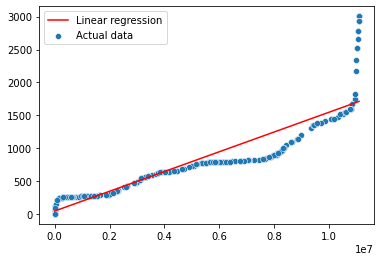

In [ ]:
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), label='Actual data')
sns.lineplot(x=X_test.flatten(), y=y_predicted.flatten(), color='red', label='Linear regression')

#### Test założeń regresji dla modelu 

#### Założenia regresji liniowej
1. Liniowa zależność pomiędzy predyktorami, a zmienną zależną (wykres rozrzutu zmiennej objaśnianej od objaśniającej)
2. Liczba obserwacji musi być większa bądź równa liczbie parametrów wyprowadzonych z analizy regresji - współczynniki dla predyktorów, wyraz wolny
3. Homoscedastyczność - wariancja reszt, składnika losowego jest taka sama dla wszystkich obserwacji (wykres rozrzutu reszt)
4. Nie występuje autokorelacja reszt, składnika losowego (Test Durbina-Watsona)
5. Reszty mają rozkład zbliżony do rozkładu normalnego (historgam oraz p-value z testu normalności Andersona-Darlinga)
6. Brak współliniowości predyktorów - regresja wieloraka, wielokrotna (VIF i macierz korelacji)

In [ ]:
corr = x_no.corr()
corr.style.background_gradient(cmap='coolwarm')

,confirmed,deaths,tests,vaccines,people_vaccinated,people_fully_vaccinated,government_response_index,stringency_index,containment_health_index,economic_support_index
confirmed,1.000000,0.927240,0.775490,0.806244,0.678833,0.733527,-0.303318,-0.529714,-0.331443,0.161859
deaths,0.927240,1.000000,0.893999,0.867930,0.795095,0.814043,-0.079060,-0.413780,-0.108116,0.307636
tests,0.775490,0.893999,1.000000,0.951729,0.946817,0.932508,0.067221,-0.367691,0.043654,0.328056
vaccines,0.806244,0.867930,0.951729,1.000000,0.973069,0.989276,-0.142738,-0.520984,-0.168282,0.226384
people_vaccinated,0.678833,0.795095,0.946817,0.973069,1.000000,0.978613,-0.050488,-0.463060,-0.073178,0.246810
people_fully_vaccinated,0.733527,0.814043,0.932508,0.989276,0.978613,1.000000,-0.139908,-0.526264,-0.165097,0.223756
government_response_index,-0.303318,-0.079060,0.067221,-0.142738,-0.050488,-0.139908,1.000000,0.865169,0.997960,0.624278
stringency_index,-0.529714,-0.413780,-0.367691,-0.520984,-0.463060,-0.526264,0.865169,1.000000,0.877476,0.367907
containment_health_index,-0.331443,-0.108116,0.043654,-0.168282,-0.073178,-0.165097,0.997960,0.877476,1.000000,0.573130
economic_support_index,0.161859,0.307636,0.328056,0.226384,0.246810,0.223756,0.624278,0.367907,0.573130,1.000000


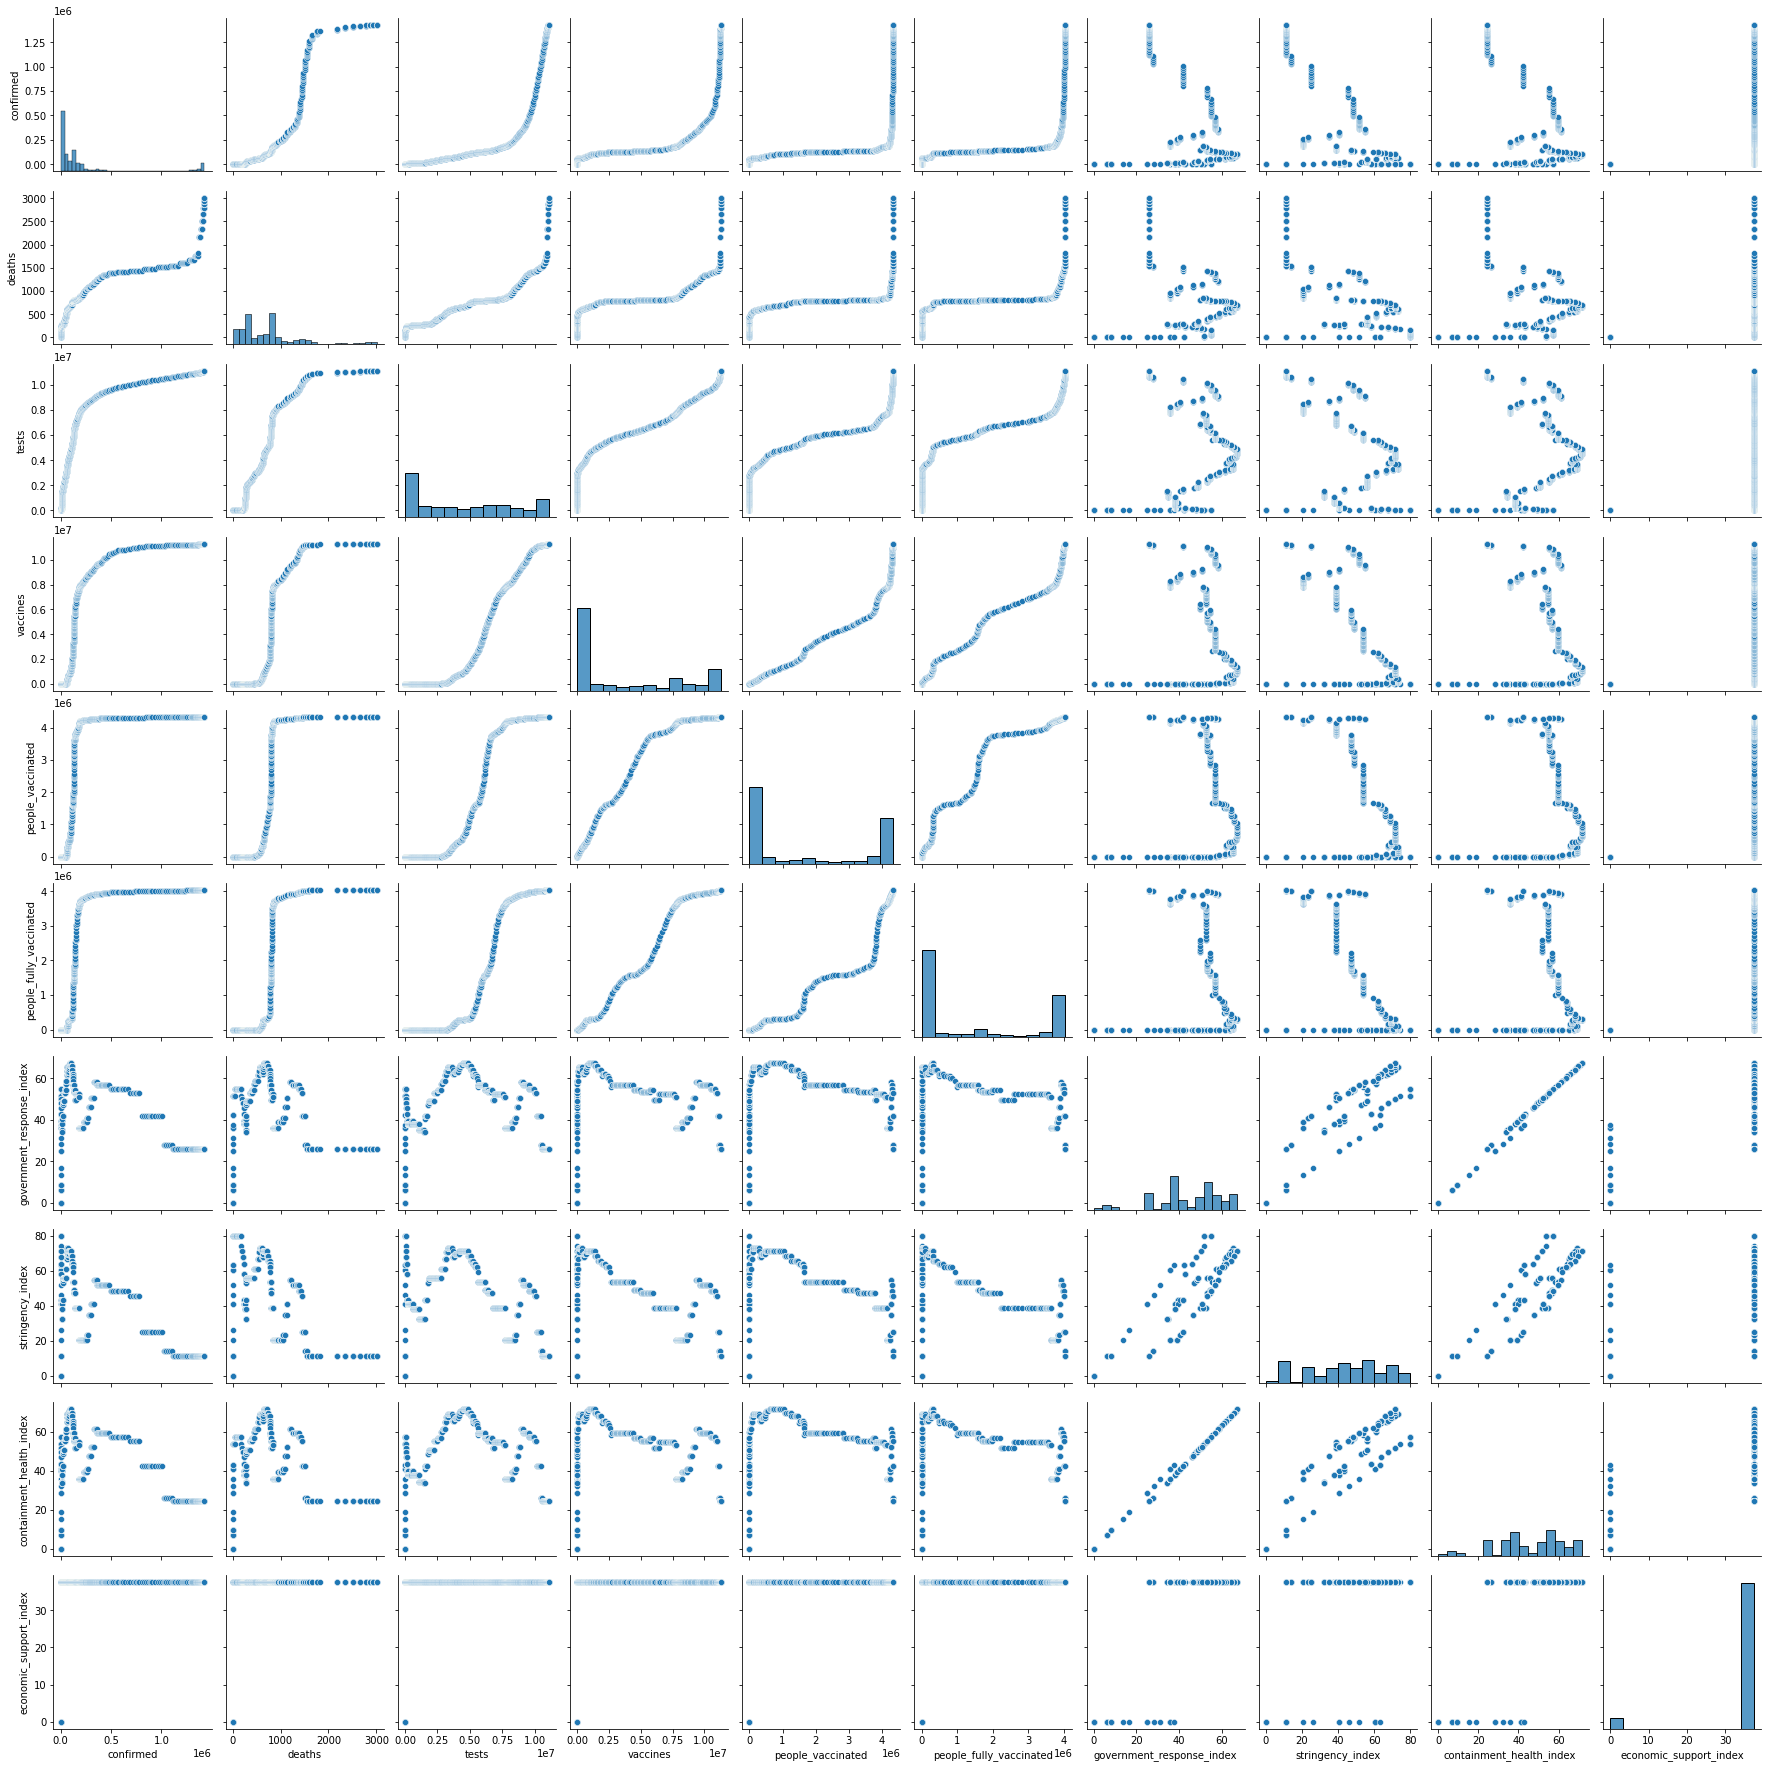

In [ ]:
sns.pairplot(x_no)

Ad 1. Związek między zmiennymi nie jest do końca liniowy, ale korelacja zmiennych jest wysoka i wynosi ok. 0.89

Ad 2. Założenie o liczbie obserwacji spełnione.

Ad 5. Rozkład reszt: 

In [ ]:
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


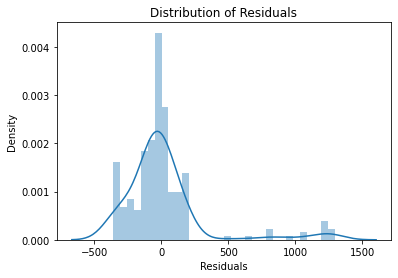

In [ ]:
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

Test normalności Andersona-Darlinga - interpretacja testu:

p-value z testu < 0.05 oznacza, że rozkład nie jest w przybliżeniu normalny

In [ ]:
# Performing the Anderson-Darling test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value: {}'.format(p_value))

p-value: 0.0


Ad 4. Brak autokorelacji reszt: 

Interpretacja testu Durbina-Watsona:
 - [1.5, 2.5] - brak autokorelacji w danych
 - [0, 1.5) - to dodatnia autokorelacja
 - (2.5, 4] - to ujemna autokorelacja

In [ ]:
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 2.033606348660986


Ad 3. Homoscedastyczność: 

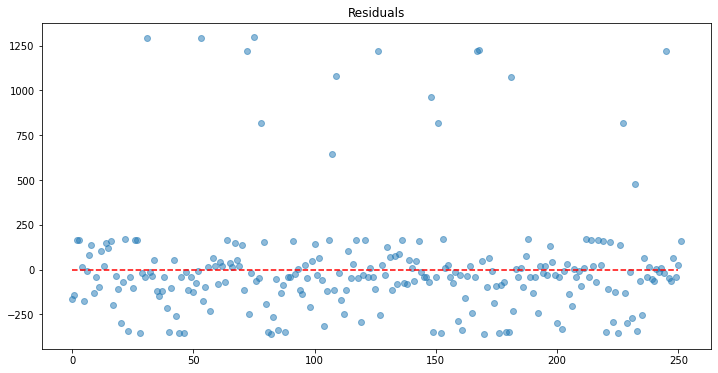

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='red', linestyle='--')
plt.title('Residuals')
plt.show() 

**Obserwacje**

Nie są spełnione założenia:
- ad 1. o liniowym związku między predykatorem, a zmienną zależną
- ad 3. wariancja reszt nie jest taka sama dla wszystkich obserwacji
- od 5. reszty nie mają rozkładu zbliżonego do normalnego

**Wnioski**

Niska jakość predykcyjna modelu.

## Model prosty dla zmiennej 'confirmed'

In [ ]:
for predicator in predicators:
  x = x_no[predicator].values
  y = x_no.confirmed.values
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

  X_train= X_train.reshape(-1, 1)
  X_test = X_test.reshape(-1, 1)
  y_train= y_train.reshape(-1, 1)
  y_test= y_test.reshape(-1, 1)

  # Create linear regression object
  regr = LinearRegression()

  # Train the model using the training sets
  regr.fit(X_train, y_train)

  # Predict values
  y_predicted = regr.predict(X_test)

  # Evaluate
  metrics.at['R^2', predicator] = r2_score(y_test, y_predicted)
  metrics.at['rmse', predicator] = np.sqrt(mean_squared_error(y_test, y_predicted))

In [ ]:
metrics

,tests,vaccines,people_vaccinated,people_fully_vaccinated,government_response_index,stringency_index,containment_health_index,economic_support_index
R^2,0.617188,0.671876,0.484225,0.557653,0.090882,0.275266,0.109954,0.029222
rmse,255420.532092,236473.225303,296478.456698,274564.645203,393616.492411,351440.985589,389465.726804,406745.728659


Najlepsze metryki dla zmiennej 'vaccines'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_no['vaccines'].values, y, test_size=0.3, random_state=0)

X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predict values
y_predicted = regr.predict(X_test)

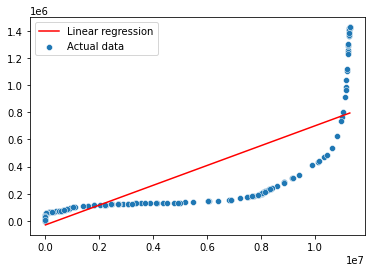

In [ ]:
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), label='Actual data')
sns.lineplot(x=X_test.flatten(), y=y_predicted.flatten(), color='red', label='Linear regression')

#### Test założeń regresji dla modelu

Ad 1. Związek nie przypomina liniowego, wysoka korelacja zmiennych 0.8

Ad 2. Założenie o liczbie zmiennych spełnione

Ad 5. Rozkład reszt: 

In [ ]:
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


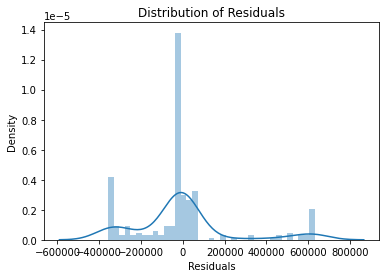

In [ ]:
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [ ]:
# Performing the Anderson-Darling test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value: {}'.format(p_value))

p-value: 0.0


Ad 4. Autokorelacja reszt:

In [ ]:
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 2.030251893374247


Ad 3. Homoscedastyczność

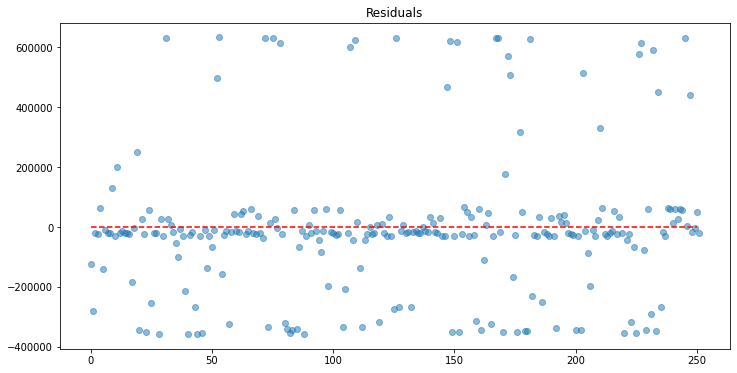

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='red', linestyle='--')
plt.title('Residuals')
plt.show() 

**Obserwacje**

Również w tym przypadku założenia o liniowym związku, o normalnym rozkładzie reszt modelu oraz o stałej wariancji reszt nie są spełnione

**Wnioski**

Niska jakość predykcyjna prostego modelu dla zmiennej 'confirmed'


## Model regresji wielorakiej dla zmiennej 'deaths'

Ad 6. Założenie o braku współliniowości zmiennych objaśniających modelu

Variance Inflation Factors (VIF)
- \>10: przesłanka o współliniowości w danych
- \>100: pewność współliniowości w danych

In [ ]:
# For each X, calculate VIF and save in dataframe
list1 = ['tests', 'vaccines', 'people_vaccinated', 'people_fully_vaccinated', 'stringency_index']
df = pd.DataFrame(x_no.filter(list1)) 

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,40.682880,tests
1,125.839448,vaccines
2,55.042554,people_vaccinated
3,119.020871,people_fully_vaccinated
4,3.299705,stringency_index


- Przy wyliczaniu wskaźnika VIF wybrałam podzbiór możliwych predykatorów, ponieważ wartości wskaźnika liczone na raz dla wszystkich predykatorów (lista 'predicators') wychodziły nieprawidłowo i nie dało się ich interpretować
- Sprawdzałam akurat ten podzbiór, ponieważ chciałam wykorzystać zmienną 'tests', której używałam do predykcji w prostym modelu
- Do predykcji zmiennej 'deaths' wybieram zmienne 'tests', 'people_vaccinated' oraz 'stringency_index', ponieważ są one najmniej współliniowe oraz mają całkiem dużą korelację ze zmienną 'deaths'
- W pierwszej kolejności wykonam model używając tylko dwóch predykatorów - 'tests' oraz 'people_vaccinated'. Następnie przy pomocy trzech predykatorów - dodając 'stringency_index'

In [ ]:
possible_predicator_sets = [['tests', 'people_vaccinated'], ['tests', 'people_vaccinated', 'stringency_index']]

metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
iter = 0

for set_of_predicators in possible_predicator_sets:
  X_train, X_test, y_train, y_test = train_test_split(x_no.filter(set_of_predicators), x_no.deaths, test_size=0.3, random_state=0)

  # Create linear regression object
  regr = LinearRegression()

  # Train the model using the training sets
  regr.fit(X_train, y_train)

  # Predict values
  y_predicted = regr.predict(X_test)

  # Evaluate
  metrics.at['R^2', iter] = r2_score(y_test, y_predicted)
  metrics.at['rmse', iter] = np.sqrt(mean_squared_error(y_test, y_predicted))

  iter = iter+1

In [ ]:
metrics

,0,1
R^2,0.811720,0.842850
rmse,291.513511,266.326402


Lepsze wyniki (większy współczynnik korelacji oraz mniejszy błąd) dla zbioru trzech predykatorów.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_no.filter(['tests', 'people_vaccinated', 'stringency_index']), x_no.deaths, test_size=0.3, random_state=0)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predict values
y_predicted = regr.predict(X_test)

#### Test pozostałych warunków

Ad 1. Liniowy związek nie jest spełniony dla zmiennych objaśniających i objaśnianej

Ad 2. Zał. o liczbie zmiennych spełnione

Ad 5. Rozkład reszt:

In [ ]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


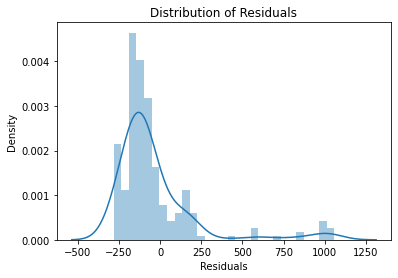

In [ ]:
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [ ]:
# Performing the Anderson-Darling test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value: {}'.format(p_value))

p-value: 0.0


Ad 4. Autokorelacja reszt

In [ ]:
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 1.9340258451977486


Ad 3. Homoscedastyczność

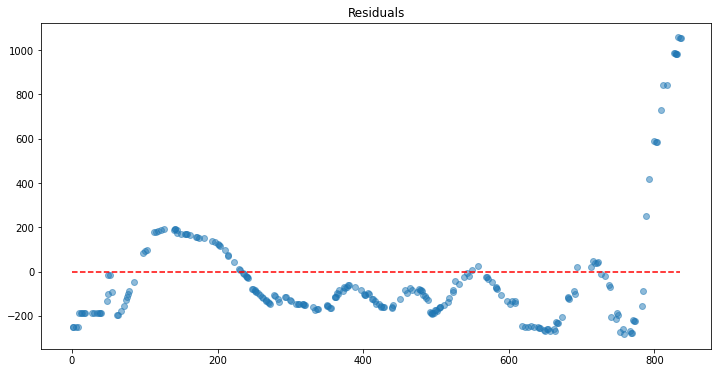

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='red', linestyle='--')
plt.title('Residuals')
plt.show()  

**Obserwacje**

Model mimo dobrej wartości współczynnika determinacji R^2, nie spełnia podstawowych założeń dla regresji liniowej, tj.:
- Ad 1. o liniowym związku zmiennych objaśniających i objaśnianej
- Ad 3. Homoscedastyczność reszt
- Ad 5. Rozkład normalny reszt

Stąd wniosek o niskiej jakości tego modelu do predykcji zmiennej 'deaths'. Model regresji wielorakiej nie jest dobrym wyborem w tym przypadku.

## Model regresji wielorakiej dla zmiennej 'confirmed'

Sprawdzam predykcję modelu dla tego samego zestawu zmiennych, co dla zmiennej 'deaths' (te same trzy zmienne są podobnie mocno skorelowane ze zmienną 'confirmed') oraz występuje ich niewielka współliniowość.

In [ ]:
iter = 0

for set_of_predicators in possible_predicator_sets:
  X_train, X_test, y_train, y_test = train_test_split(x_no.filter(set_of_predicators), x_no.confirmed, test_size=0.3, random_state=0)

  # Create linear regression object
  regr = LinearRegression()

  # Train the model using the training sets
  regr.fit(X_train, y_train)

  # Predict values
  y_predicted = regr.predict(X_test)

  # Evaluate
  metrics.at['R^2', iter] = r2_score(y_test, y_predicted)
  metrics.at['rmse', iter] = np.sqrt(mean_squared_error(y_test, y_predicted))

  iter = iter+1

In [ ]:
metrics

,0,1
R^2,0.633869,0.767095
rmse,249793.570709,199228.977075


Również w predykcji zmiennej 'confirmed' model regresji wielorakiej wydaje się dawać lepszy rezultat przy zastosowaniu trzech zmiennych.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_no.filter(['tests', 'people_vaccinated', 'stringency_index']), x_no.deaths, test_size=0.3, random_state=0)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predict values
y_predicted = regr.predict(X_test)

#### Test pozostałych warunków

Ad 1. Liniowy związek nie jest spełniony dla zmiennych objaśniających i objaśnianej

Ad 2. Zał. o liczbie zmiennych spełnione

Ad 5. Rozkład reszt:

In [ ]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


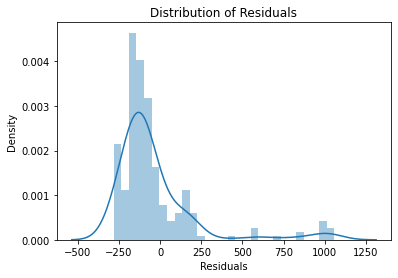

In [ ]:
plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [ ]:
# Performing the Anderson-Darling test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value: {}'.format(p_value))

p-value: 0.0


Ad 4. Autokorelacja reszt

In [ ]:
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 1.9340258451977486


Ad 3. Homoscedastyczność

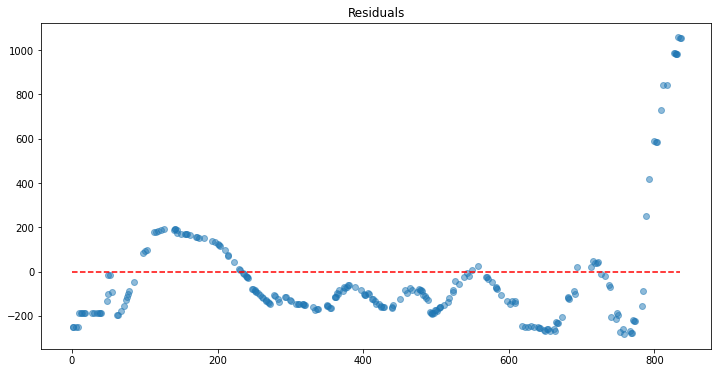

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='red', linestyle='--')
plt.title('Residuals')
plt.show()  

**Obserwacje**

Model nie spełnia podstawowych założeń regresji (liniowowsc, rozklad reszt, stała warancja reszt)

**Wnioski**

Model o niskiej wartości predykcyjnej.

## Porównanie wyników dla modeli regresji liniowej oraz wielowymiarowej

1. Zarówno w przypadku regresji liniowej, jak i regresji wielorakiej modele mimo całkiem dobrych wartości współczynnika R^2:
- model prosty: 'deaths' - 0.79, 'confirmed' - 0.67
- model wielowymiarowy: 'deaths' - 0.84, 'confirmed' - 0.77

  Nie spełniały podstawowych założeń regresji.

2. W przypadku prostego modelu dane układały się wykładniczo i już na pierwszy rzut oka widać było, że nie można dobrze dopasować do nich prostej. Potwierdziły to tylko testy poszczególnych założeń regresji

3. W przypadku modelu wielowymiarowego, nie dało wykononać się wizualizacji wyników - ze względu na zbyt dużą liczbę zmiennych, ale testy dały podobny rezultat.

**Wniosek**

Modele regresji liniowej i wielorakiej nie powinny być stosowane przypadku predykcji (a) liczby zachorowań; (b) liczby śmierci spowodowanej chorobą COVID-19 dla powyższych danych.




## SVR

#### Predykcja 'deaths'

- Linear, polynomial or gaussian SVR. 
- For non-linear condition so we can select polynomial or gaussian 
- RBF - a gaussian type kernel

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
X = x_no.loc[:, 'tests'].values 
y = x_no.loc[:, 'deaths'].values 

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [ ]:
# Feature scaling
X_sc = StandardScaler()
y_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
y_train = y_sc.fit_transform(y_train)

In [ ]:
kernels = ['linear', 'poly', 'rbf']
predictions = pd.DataFrame({'X_test' : X_test.flatten(), 'y_test' : y_test.flatten()})

for kernel in kernels:
  # Create regression object
  regrassor = SVR(kernel = kernel)

  # Train the model using training sets
  regrassor.fit(X_train, y_train)

  # Predict values
  y_pred = regrassor.predict(X_sc.transform(X_test))
  y_pred = y_sc.inverse_transform(y_pred.reshape(-1,1))

  predictions[kernel] = y_pred.flatten()

  # Evaluate
  metrics.at['R^2', kernel] = r2_score(y_test, y_pred)
  metrics.at['rmse', kernel] = np.sqrt(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


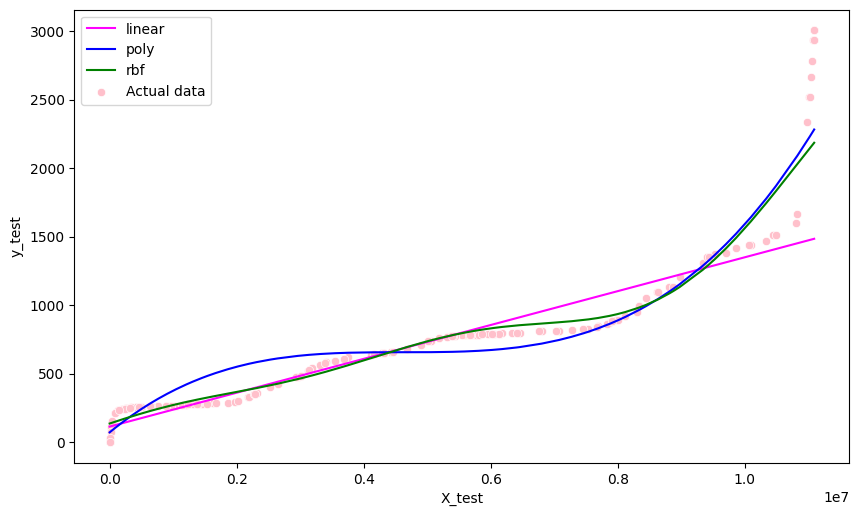

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

fig=plt.figure(figsize=(10,6), dpi= 100)
sns.scatterplot(x=predictions.X_test, y=predictions.y_test, color='pink', label='Actual data')
sns.lineplot(x=predictions.X_test, y=predictions.linear, color='magenta', label='linear')
sns.lineplot(x=predictions.X_test, y=predictions.poly, color='blue', label='poly')
sns.lineplot(x=predictions.X_test, y=predictions.rbf, color='green', label='rbf')
fig.show()

In [ ]:
metrics

,linear,poly,rbf
R^2,0.728695,0.919200,0.922918
rmse,350.696274,191.384881,186.930404


- Najlepsze dopasowanie dla wartości parametru kernel = 'rbf'
- O wiele wyższe wartości współczynników determinacji i mniejsze błędy niż w przypadku poprzednich dwóch modeli
- Linia regresji o wiele lepiej 'przylega' do rzeczywistych danych

#### Predykcja 'confirmed'

In [ ]:
X = x_no.loc[:, 'vaccines'].values 
y = x_no.loc[:, 'confirmed'].values 

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

# Feature scaling
X_sc = StandardScaler()
y_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
y_train = y_sc.fit_transform(y_train)

kernels = ['linear', 'poly', 'rbf']
predictions = pd.DataFrame({'X_test' : X_test.flatten(), 'y_test' : y_test.flatten()})

for kernel in kernels:
  # Create regression object
  regrassor = SVR(kernel = kernel)

  # Train the model using training sets
  regrassor.fit(X_train, y_train)

  # Predict values
  y_pred = regrassor.predict(X_sc.transform(X_test))
  y_pred = y_sc.inverse_transform(y_pred.reshape(-1,1))

  predictions[kernel] = y_pred.flatten()

  # Evaluate
  metrics.at['R^2', kernel] = r2_score(y_test, y_pred)
  metrics.at['rmse', kernel] = np.sqrt(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


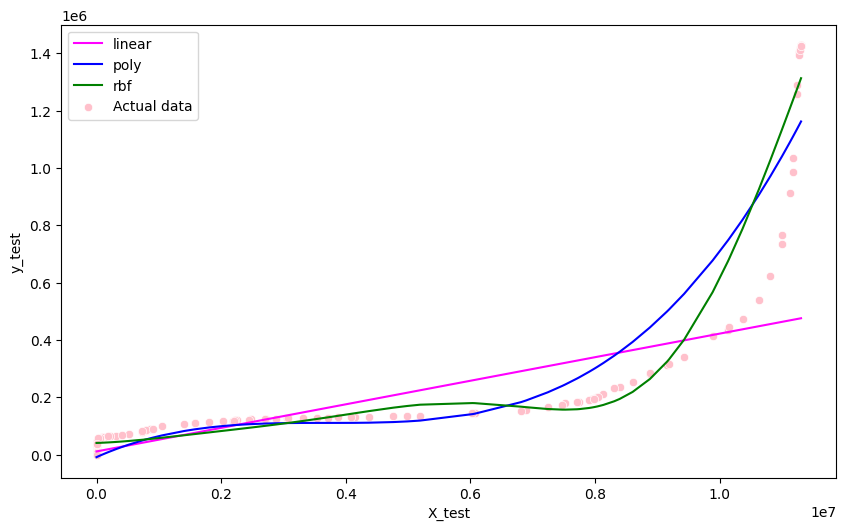

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

fig=plt.figure(figsize=(10,6), dpi= 100)
sns.scatterplot(x=predictions.X_test, y=predictions.y_test, color='pink', label='Actual data')
sns.lineplot(x=predictions.X_test, y=predictions.linear, color='magenta', label='linear')
sns.lineplot(x=predictions.X_test, y=predictions.poly, color='blue', label='poly')
sns.lineplot(x=predictions.X_test, y=predictions.rbf, color='green', label='rbf')
fig.show()

In [ ]:
metrics

,linear,poly,rbf
R^2,0.492246,0.916061,0.947386
rmse,273003.353943,111000.018534,87880.131964


Najlepsze dopasowanie modelu również dla wartości parametru kernel='rbf'

## Drzewa regresyjne

#### Predykcja 'deaths'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
possible_predicator_sets = [['tests'], 
                            ['tests', 'people_vaccinated'],
                            ['tests', 'people_vaccinated', 'stringency_index'],
                            ['tests', 'stringency_index'],
                            ['people_vaccinated', 'stringency_index']]

iter = 0

for feature_set in possible_predicator_sets:
  x = x_no[feature_set].values
  y = x_no.deaths.values
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

  model = DecisionTreeRegressor(random_state=44)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  # Evaluate
  metrics.at['R^2', iter] = r2_score(y_test, y_pred)
  metrics.at['rmse', iter] = np.sqrt(mean_squared_error(y_test, y_pred))

  iter = iter+1

In [ ]:
metrics

,0,1,2,3,4
R^2,0.998823,0.998814,0.998853,0.998823,0.996598
rmse,23.044895,23.137694,22.751090,23.045956,39.186852


- Dla każdego z wybranych przeze mnie zbiorów zmiennych model ma wartość R^2 równą prawie 1

- Wizualizacja modelu z jedną zmienną objaśniającą: 

In [ ]:
x = x_no['tests'].values
y = x_no.deaths.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

model = DecisionTreeRegressor(random_state=44)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
metrics.at['R^2', 'regression_tree_model'] = r2_score(y_test, y_pred)
metrics.at['rmse', 'regression_tree_model'] = np.sqrt(mean_squared_error(y_test, y_pred))


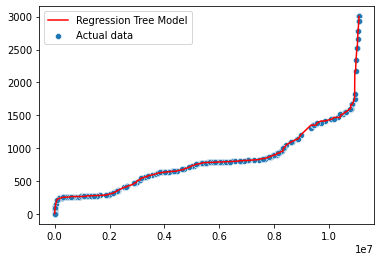

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

sns.scatterplot(x=X_test, y=y_test, label='Actual data')
sns.lineplot(x=X_test, y=y_pred, color='red', label='Regression Tree Model')

Model wydaje się być przetrenowany

#### Predykcja 'confirmed'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
possible_predicator_sets = [['vaccines'], 
                            ['people_vaccinated'],
                            ['people_vaccinated', 'stringency_index'],
                            ['vaccines', 'stringency_index']]

iter = 0

for feature_set in possible_predicator_sets:
  x = x_no[feature_set].values
  y = x_no.confirmed.values
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

  model = DecisionTreeRegressor(random_state=44)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  # Evaluate
  metrics.at['R^2', iter] = r2_score(y_test, y_pred)
  metrics.at['rmse', iter] = np.sqrt(mean_squared_error(y_test, y_pred))

  iter = iter+1

In [ ]:
metrics

,0,1,2,3
R^2,0.999553,0.999552,0.999847,0.999848
rmse,8732.415393,8740.307874,5100.994691,5087.459453


In [ ]:
x = x_no['people_vaccinated'].values
y = x_no.confirmed.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

model = DecisionTreeRegressor(random_state=44)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
metrics.at['R^2', 'regression_tree_model'] = r2_score(y_test, y_pred)
metrics.at['rmse', 'regression_tree_model'] = np.sqrt(mean_squared_error(y_test, y_pred))


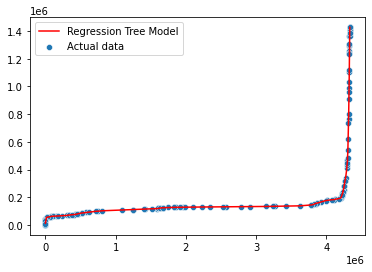

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

sns.scatterplot(x=X_test, y=y_test, label='Actual data')
sns.lineplot(x=X_test, y=y_pred, color='red', label='Regression Tree Model')

- Najlepsze metryki dla modelu utworzonego ze zmiennej 'people_vaccinated'

- Model charakteryzuje się przetrenowaniem

## Losowy las regresyjny

#### Predykacja 'deaths'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
X = x_no.loc[:, 'tests'].values
y = x_no.loc[:, 'deaths'].values

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

RF = RandomForestRegressor()

# Train the model using training sets
RF.fit(X_train, y_train)

# Predict values
y_pred = RF.predict(X_test)

# Evaluate
metrics.at['R^2', 'RandomForest'] = r2_score(y_test, y_pred)
metrics.at['rmse', 'RandomForest'] = np.sqrt(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


In [ ]:
metrics

,RandomForest
R^2,0.999887
rmse,7.152055


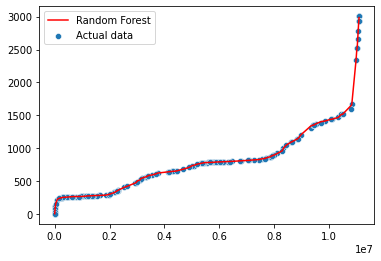

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

sns.scatterplot(x=X_test, y=y_test, label='Actual data')
sns.lineplot(x=X_test, y=y_pred, color='red', label='Random Forest')

Model przy użyciu zmiennej 'tests' charakteryzuje się przetrenowaniem

#### Predykcja 'confirmed'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
X = x_no.loc[:, 'vaccines'].values
y = x_no.loc[:, 'confirmed'].values

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

RF = RandomForestRegressor()

# Train the model using training sets
RF.fit(X_train, y_train)

# Predict values
y_pred = RF.predict(X_test)

# Evaluate
metrics.at['R^2', 'RandomForest'] = r2_score(y_test, y_pred)
metrics.at['rmse', 'RandomForest'] = np.sqrt(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


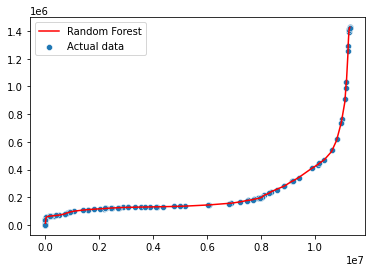

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

sns.scatterplot(x=X_test, y=y_test, label='Actual data')
sns.lineplot(x=X_test, y=y_pred, color='red', label='Random Forest')

## Porównanie modeli

- Najlepsze parametry uzyskano dla algorytmu SVR z parametrem kernel='rbf'
- Zastosowanie zarówno algorytmu opartego na drzewach decyzyjnych oraz na losowym lesie regresyjnym skutkowało zjawiskiem przetrenowania modelu

# Analiza Globalna

### Czyszczenie danych

In [ ]:
x, src = covid19() 

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190553 entries, 37086 to 80962
Data columns (total 47 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   id                                   190553 non-null  object        
 1   date                                 190553 non-null  datetime64[ns]
 2   confirmed                            174078 non-null  float64       
 3   deaths                               158023 non-null  float64       
 4   recovered                            70382 non-null   float64       
 5   tests                                78447 non-null   float64       
 6   vaccines                             48517 non-null   float64       
 7   people_vaccinated                    46155 non-null   float64       
 8   people_fully_vaccinated              43799 non-null   float64       
 9   hosp                                 32393 non-null   float64      

In [ ]:
insignificant = ['id', 'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing', 
       'stay_home_restrictions', 'internal_movement_restrictions', 
       'international_movement_restrictions', 'information_campaigns', 
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection','administrative_area_level', 'administrative_area_level_1', 
       'administrative_area_level_2', 'administrative_area_level_3', 
       'latitude', 'longitude', 'iso_alpha_3', 
       'iso_numeric', 'iso_currency', 'key_local', 'key_google_mobility', 
       'key_apple_mobility', 'key_jhu_csse', 'key_nuts', 'key_gadm']

x.drop(insignificant, axis=1, inplace=True)

Rozpoczynam od pozbycia się zmiennych, które uważam za nieistotne. Wybieram te same zmienne co do analizy lokalnej.

In [ ]:
percent_missing(x)

                           Percent of missing values [%]
date                                                0.00
confirmed                                           8.65
deaths                                             17.07
recovered                                          63.06
tests                                              58.83
vaccines                                           74.54
people_vaccinated                                  75.78
people_fully_vaccinated                            77.01
hosp                                               83.00
icu                                                84.25
vent                                               97.09
government_response_index                          20.03
stringency_index                                   19.98
containment_health_index                           19.99
economic_support_index                             20.02
population                                          0.44
iso_alpha_2                    

Od razu odrzucam rekordy, o których nie wiadomo z jakiego są kraju.

In [ ]:
x = x[x.loc[:, 'iso_alpha_2'].notnull()]

In [ ]:
num_of_rows_by_country = x.groupby('iso_alpha_2')['iso_alpha_2'].count().sort_values(ascending = False).to_frame()
num_of_rows_by_country

,iso_alpha_2
iso_alpha_2,
MX,865
TH,863
CN,862
AR,862
TW,852
...,...
NU,266
AS,234
TM,190


In [ ]:
group = x.groupby('iso_alpha_2')
population = group.apply(lambda x: x['population'].unique()[0]).to_frame()
population.columns = ['population']
population

,population
iso_alpha_2,
AD,77006.0
AE,9630959.0
AF,37172386.0
AG,96286.0
AI,18090.0
...,...
YE,28498687.0
YT,256518.0
ZA,57779622.0


##### Ze względu na państwo

Procent brakujących wartości w kolumnach, grupując dane wg kraju:

In [ ]:
missing = pd.DataFrame()

for col in x:
  df = x.groupby('iso_alpha_2')[col].apply(lambda a: a.isnull().sum()/len(a)*100).to_frame()
  missing[col] = df[col]

missing

,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,government_response_index,stringency_index,containment_health_index,economic_support_index,population,iso_alpha_2
iso_alpha_2,,,,,,,,,,,,,,,,,
AD,0.0,4.739336,7.109005,60.071090,90.995261,94.549763,95.142180,95.853081,100.000000,100.000000,100.0,1.421801,1.421801,1.421801,1.421801,0.0,0.0
AE,0.0,0.829384,6.872038,40.402844,4.857820,55.924171,85.189573,77.962085,100.000000,100.000000,100.0,0.592417,0.592417,0.592417,0.592417,0.0,0.0
AF,0.0,3.909953,7.227488,49.289100,99.644550,93.601896,93.957346,94.786730,100.000000,100.000000,100.0,2.251185,2.251185,2.251185,2.251185,0.0,0.0
AG,0.0,6.042654,9.004739,85.189573,98.578199,89.218009,89.336493,90.639810,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,0.0,0.0
AI,0.0,7.819905,72.037915,97.511848,99.763033,93.957346,93.957346,95.379147,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YE,0.0,9.360190,11.729858,64.691943,99.763033,97.156398,97.156398,97.985782,100.000000,100.000000,100.0,2.369668,2.369668,2.369668,2.369668,0.0,0.0
YT,0.0,7.369759,0.000000,100.000000,7.369759,36.213469,36.213469,36.213469,0.000000,0.000000,100.0,100.000000,100.000000,100.000000,100.000000,0.0,0.0
ZA,0.0,3.502415,6.521739,9.299517,4.347826,61.231884,62.318841,67.874396,87.077295,87.077295,100.0,1.449275,1.449275,1.449275,1.449275,0.0,0.0


Podsumowanie odsetka brakujących danych dla wszystkich krajów:

In [ ]:
missing.describe()

,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,government_response_index,stringency_index,containment_health_index,economic_support_index,population,iso_alpha_2
count,232.0,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.0
mean,0.0,10.698532,18.823796,63.902965,59.792068,74.796732,76.052831,77.272739,83.072103,84.271586,97.028980,21.742356,21.693256,21.704032,21.726135,0.431034,0.0
std,0.0,20.384008,27.743988,27.292613,40.957655,22.631270,22.468924,22.530964,35.258170,34.142021,16.505207,39.965290,39.988610,39.983108,39.973370,6.565322,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,4.346493,6.161137,43.927725,12.162829,55.509479,57.849526,58.382701,100.000000,100.000000,100.000000,0.592417,0.592417,0.592417,0.592417,0.000000,0.0
50%,0.0,6.042654,7.701422,61.018957,79.206161,83.945498,86.255924,89.691943,100.000000,100.000000,100.000000,1.421801,1.421801,1.421801,1.421801,0.000000,0.0
75%,0.0,6.872038,11.640995,90.373223,99.792654,94.579384,95.171801,95.853081,100.000000,100.000000,100.000000,3.436019,3.252622,3.252622,3.252622,0.000000,0.0
max,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0


Odrzucenie krajów, które mają zbyt wysokie odsetki braków w danych:

In [ ]:
missing1 = missing.drop(missing[(missing.deaths >12) | (missing.confirmed >12) ].index)
missing1.describe()

,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,government_response_index,stringency_index,containment_health_index,economic_support_index,population,iso_alpha_2
count,175.0,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.0,175.0
mean,0.0,4.715719,6.320699,56.893561,51.988162,70.547815,72.003784,73.149895,78.584757,80.174929,96.061276,13.807983,13.742891,13.757176,13.786479,0.0,0.0
std,0.0,2.400402,2.960316,26.367296,41.179629,23.147844,23.113938,23.278550,38.449520,37.272751,18.916398,32.796659,32.818535,32.813114,32.804498,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,3.909953,5.746445,42.061611,8.886256,50.294971,50.651659,53.317536,93.538647,96.327014,100.000000,0.592417,0.592417,0.592417,0.592417,0.0,0.0
50%,0.0,5.213270,6.990521,51.540284,44.075829,73.222749,77.251185,77.962085,100.000000,100.000000,100.000000,1.421801,1.421801,1.421801,1.421801,0.0,0.0
75%,0.0,6.398104,8.123245,75.829384,98.992891,93.483412,93.957346,94.786730,100.000000,100.000000,100.000000,2.428910,2.369668,2.369668,2.369668,0.0,0.0
max,0.0,9.360190,11.848341,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0


In [ ]:
missing2 = missing1.drop(missing1[missing1.tests >45].index)
missing2.describe()

,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,government_response_index,stringency_index,containment_health_index,economic_support_index,population,iso_alpha_2
count,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.0,89.0
mean,0.0,3.930771,5.218070,51.191227,13.891887,59.174560,60.556520,62.140134,60.399820,65.940846,92.255318,10.351375,10.243353,10.271443,10.303738,0.0,0.0
std,0.0,2.407147,2.957978,30.036531,12.654785,22.107475,22.694583,23.209651,45.290865,43.763605,26.032995,28.364535,28.392155,28.383260,28.378799,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,1.066351,3.452528,40.402844,4.631829,41.134752,41.183432,41.706161,7.425743,8.530806,100.000000,0.592417,0.592417,0.592417,0.592417,0.0,0.0
50%,0.0,4.620853,6.398104,44.668246,9.004739,55.924171,57.227488,59.715640,100.000000,100.000000,100.000000,1.421801,1.361386,1.421801,1.421801,0.0,0.0
75%,0.0,5.687204,7.227488,65.758294,21.445498,74.763033,80.213270,81.042654,100.000000,100.000000,100.000000,2.488152,2.251185,2.369668,2.251185,0.0,0.0
max,0.0,7.701422,11.611374,100.000000,44.312796,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0


In [ ]:
missing3 = missing2.drop(missing2[missing2.vaccines > 60].index)
missing3.describe()

,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,government_response_index,stringency_index,containment_health_index,economic_support_index,population,iso_alpha_2
count,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.0
mean,0.0,3.727792,4.686256,48.895936,11.729585,43.468838,45.143509,46.612060,47.644347,54.243406,86.744679,12.770777,12.720326,12.768403,12.675528,0.0,0.0
std,0.0,2.614478,3.220636,32.648791,11.914604,11.655619,14.123019,15.236809,46.268585,45.863040,33.089517,31.831500,31.849669,31.832156,31.864603,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.770142,0.818554,39.395735,4.470158,38.714455,38.714455,39.277251,5.571293,5.828205,100.000000,0.592417,0.592242,0.592417,0.592242,0.0,0.0
50%,0.0,4.437806,6.101896,43.792129,7.369759,42.617821,42.617821,43.810631,19.609005,70.566687,100.000000,1.391594,1.297216,1.391594,1.031215,0.0,0.0
75%,0.0,5.833555,6.872038,71.625788,15.188304,51.441423,52.028381,57.612559,100.000000,100.000000,100.000000,2.986454,2.986454,2.986454,2.703056,0.0,0.0
max,0.0,7.369759,11.611374,100.000000,44.075829,59.597156,85.189573,91.113744,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,0.0


In [ ]:
missing4 = missing3.drop(missing3[missing3.stringency_index > 20].index)
missing4.describe()

,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu,vent,government_response_index,stringency_index,containment_health_index,economic_support_index,population,iso_alpha_2
count,46.0,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.0
mean,0.0,3.294482,5.045086,43.378963,12.092717,43.906850,45.799956,47.308089,51.684915,59.144720,85.015724,1.393053,1.336021,1.390369,1.285380,0.0,0.0
std,0.0,2.452605,2.849219,29.777645,12.572263,11.922319,14.564023,15.547929,45.786422,44.563035,34.848560,1.220371,1.213919,1.214187,1.171783,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.0,0.518018,3.548628,23.228337,4.043321,39.277251,39.561470,40.771451,7.130315,7.925935,100.000000,0.591891,0.521528,0.591891,0.521528,0.0,0.0
50%,0.0,4.206161,6.161137,42.239336,7.197385,43.753961,44.372038,45.949683,32.609593,89.114214,100.000000,0.784606,0.725364,0.784606,0.709642,0.0,0.0
75%,0.0,4.856383,6.872038,58.382701,19.263551,53.139434,53.495749,57.671801,100.000000,100.000000,100.000000,2.221564,2.034057,2.221564,2.034057,0.0,0.0
max,0.0,7.192575,9.123223,100.000000,44.075829,59.004739,85.189573,91.113744,100.000000,100.000000,100.000000,4.197531,4.074074,4.074074,4.197531,0.0,0.0


In [ ]:
countries = missing4.index.tolist()

x = x[x['iso_alpha_2'].isin(countries)]
x.reset_index(drop = True, inplace = True)

Dodatkowo rezygnuję z kolumn, które nadal mają zbyt dużo braków, lub są zbędne (tylko 'population') czyli:
['recovered', 'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent','population']

In [ ]:
to_many_missing = ['recovered', 'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent','population']

x.drop(to_many_missing, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38392 entries, 0 to 38391
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       38392 non-null  datetime64[ns]
 1   confirmed                  37114 non-null  float64       
 2   deaths                     36438 non-null  float64       
 3   tests                      33736 non-null  float64       
 4   vaccines                   21476 non-null  float64       
 5   government_response_index  37861 non-null  float64       
 6   stringency_index           37883 non-null  float64       
 7   containment_health_index   37862 non-null  float64       
 8   economic_support_index     37896 non-null  float64       
 9   iso_alpha_2                38392 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 2.9+ MB


In [ ]:
percent_missing(x)

                           Percent of missing values [%]
date                                                0.00
confirmed                                           3.33
deaths                                              5.09
tests                                              12.13
vaccines                                           44.06
government_response_index                           1.38
stringency_index                                    1.33
containment_health_index                            1.38
economic_support_index                              1.29
iso_alpha_2                                         0.00


#### Globalnie

In [ ]:
x.head()

,date,confirmed,deaths,tests,vaccines,government_response_index,stringency_index,containment_health_index,economic_support_index,iso_alpha_2
0,2020-01-22,NaN,NaN,NaN,NaN,1.56,2.78,1.79,0.0,GT
1,2020-01-23,NaN,NaN,NaN,NaN,1.56,2.78,1.79,0.0,GT
2,2020-01-24,NaN,NaN,NaN,NaN,1.56,2.78,1.79,0.0,GT
3,2020-01-25,NaN,NaN,NaN,NaN,1.56,2.78,1.79,0.0,GT
4,2020-01-26,NaN,NaN,NaN,NaN,1.56,2.78,1.79,0.0,GT


Dla każdego państwa i dla każdej kolumny, znalezienie pierwszego indeksu, gdzie wartością nie jej NaN :

In [ ]:
group = x.groupby('iso_alpha_2')
first_valid = pd.DataFrame()

for col in x:
  df = group.apply(lambda x: x[col].first_valid_index()).to_frame()
  df.columns = [col]
  first_valid[col] = df[col]

first_valid

,date,confirmed,deaths,tests,vaccines,government_response_index,stringency_index,containment_health_index,economic_support_index,iso_alpha_2
iso_alpha_2,,,,,,,,,,
AE,15057,15064,15115,15064,15406,15057,15057,15057,15057,15057
AR,25092,25154,25159,25092,25455,25092,25092,25092,25092,25092
AT,18433,18433,18433,18766,18738,18433,18433,18433,18433,18433
AU,31662,31662,31662,31662,31662,31662,31662,31662,31662,31662
BE,3286,3325,3331,3325,3627,3286,3286,3286,3286,3286
BG,32502,32548,32551,32582,32844,32502,32502,32502,32502,32502
BH,16745,16778,16799,16788,17081,16745,16745,16745,16745,16745
BO,29974,30023,30041,30026,30351,29974,29974,29974,29974,29974
BR,13403,13403,13403,13464,13730,13403,13403,13403,13403,13403


Słownik z indeksami pierwszych wystąpień danych z państwa:

In [ ]:
first_occurence_of_country = dict()

for country in countries:
  first_occurence_of_country[country] = min(x[x.iso_alpha_2 == country].index.tolist())

Wypełnienie danych wartością 0
- od pierwszego wystąpienia danych dla konkretnego państwa 
- do ostatniej wartości NaN, przed numeryczną wartością

(początkowe rekordy są w dużej mierze NaN)

In [ ]:
dict(first_valid.loc['AE', :])

{'confirmed': 15064,
 'containment_health_index': 15057,
 'date': 15057,
 'deaths': 15115,
 'economic_support_index': 15057,
 'government_response_index': 15057,
 'iso_alpha_2': 15057,
 'stringency_index': 15057,
 'tests': 15064,
 'vaccines': 15406}

In [ ]:
for country in countries:
  for_specific_country = dict(first_valid.loc[country, :])
  
  first_occ_idx = first_occurence_of_country[country]

  for feature, idx_value in for_specific_country.items():
    x.loc[first_occ_idx: idx_value-1, feature] = 0.0


Sprawdzenie:

In [ ]:
group = x.groupby('iso_alpha_2')
first_valid = pd.DataFrame()

for col in x:
  df = group.apply(lambda x: x[col].first_valid_index()).to_frame()
  df.columns = [col]
  first_valid[col] = df[col]

first_valid

,date,confirmed,deaths,tests,vaccines,government_response_index,stringency_index,containment_health_index,economic_support_index,iso_alpha_2
iso_alpha_2,,,,,,,,,,
AE,15057,15057,15057,15057,15057,15057,15057,15057,15057,15057
AR,25092,25092,25092,25092,25092,25092,25092,25092,25092,25092
AT,18433,18433,18433,18433,18433,18433,18433,18433,18433,18433
AU,31662,31662,31662,31662,31662,31662,31662,31662,31662,31662
BE,3286,3286,3286,3286,3286,3286,3286,3286,3286,3286
BG,32502,32502,32502,32502,32502,32502,32502,32502,32502,32502
BH,16745,16745,16745,16745,16745,16745,16745,16745,16745,16745
BO,29974,29974,29974,29974,29974,29974,29974,29974,29974,29974
BR,13403,13403,13403,13403,13403,13403,13403,13403,13403,13403


Po wypełnieniu początkowych wartości zerami, resztę będę interpolować:

In [ ]:
percent_missing(x)

                           Percent of missing values [%]
date                                                0.00
confirmed                                           0.23
deaths                                              0.26
tests                                               5.65
vaccines                                            4.83
government_response_index                           1.38
stringency_index                                    1.33
containment_health_index                            1.38
economic_support_index                              1.29
iso_alpha_2                                         0.00


In [ ]:
for col in x:
  x[col].interpolate(inplace=True)

In [ ]:
percent_missing(x)

                           Percent of missing values [%]
date                                                 0.0
confirmed                                            0.0
deaths                                               0.0
tests                                                0.0
vaccines                                             0.0
government_response_index                            0.0
stringency_index                                     0.0
containment_health_index                             0.0
economic_support_index                               0.0
iso_alpha_2                                          0.0


## Agregacja zmiennych

In [ ]:
x_agg = x.drop('iso_alpha_2', axis=1).groupby('date').sum()
x_agg

,confirmed,deaths,tests,vaccines,government_response_index,stringency_index,containment_health_index,economic_support_index
date,,,,,,,,
2020-01-01,0.0,0.0,2.900000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.0,0.0,1.960000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.0,0.0,2.900000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2020-01-04,0.0,0.0,4.130000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2020-01-05,0.0,0.0,5.100000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2022-05-11,309007041.5,4056687.0,3.108521e+09,4.124674e+09,1055.440101,768.130148,1092.154588,799.888780
2022-05-12,299196182.0,3923245.0,2.419033e+09,3.937929e+09,870.927509,644.299346,899.781198,669.987270
2022-05-13,272201050.5,3709844.0,1.696525e+09,3.832067e+09,698.828251,537.751878,723.381141,527.585759


## Związki między zmiennymi

In [ ]:
corr = x_agg.corr()
corr.style.background_gradient(cmap='coolwarm')

,confirmed,deaths,tests,vaccines,government_response_index,stringency_index,containment_health_index,economic_support_index
confirmed,1.000000,0.956253,0.986799,0.959228,0.056751,-0.197443,0.105093,-0.250229
deaths,0.956253,1.000000,0.977663,0.911400,0.190763,-0.089482,0.240670,-0.141986
tests,0.986799,0.977663,1.000000,0.967629,0.095875,-0.166641,0.147484,-0.236150
vaccines,0.959228,0.911400,0.967629,1.000000,-0.028686,-0.256262,0.023444,-0.349229
government_response_index,0.056751,0.190763,0.095875,-0.028686,1.000000,0.947167,0.997486,0.897457
stringency_index,-0.197443,-0.089482,-0.166641,-0.256262,0.947167,1.000000,0.936941,0.898740
containment_health_index,0.105093,0.240670,0.147484,0.023444,0.997486,0.936941,1.000000,0.863945
economic_support_index,-0.250229,-0.141986,-0.236150,-0.349229,0.897457,0.898740,0.863945,1.000000


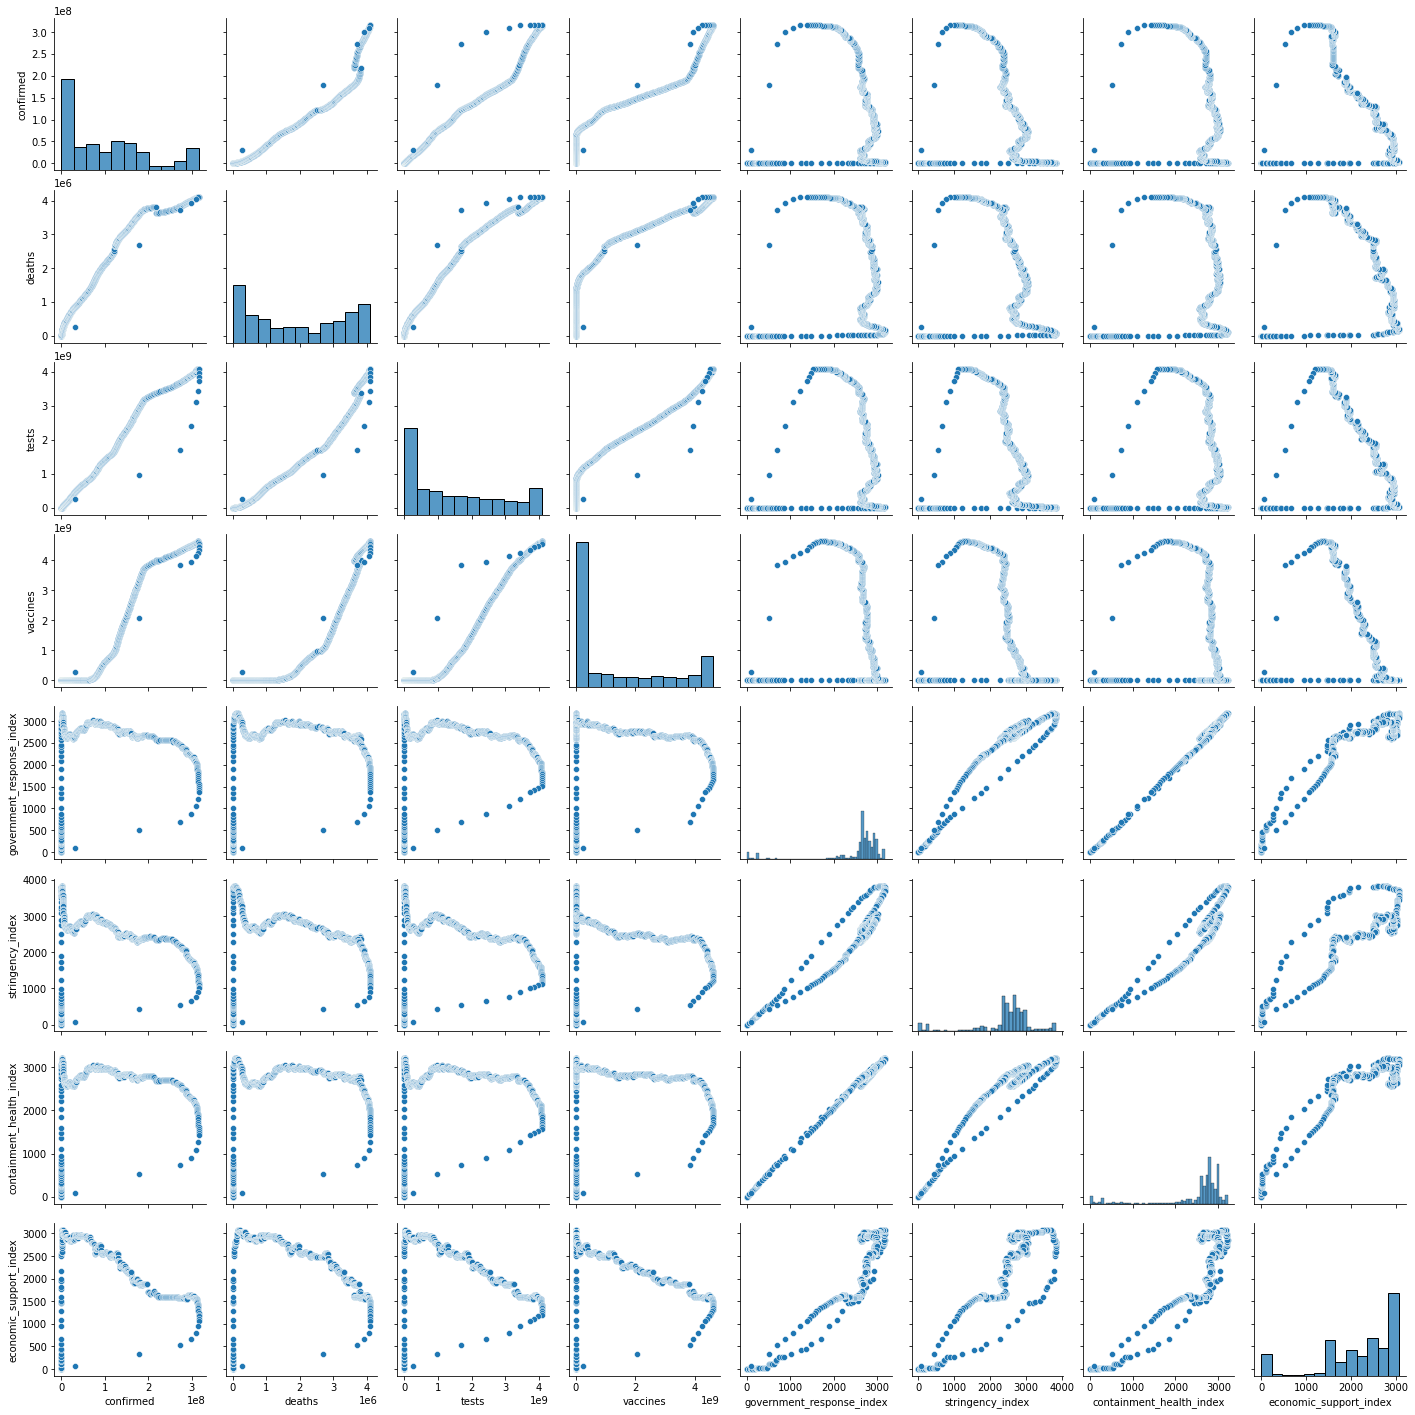

In [ ]:
sns.pairplot(x_agg)

## Prosty model liniowy

### Zmienna 'deaths'

Do analizy wykorzystam zmienną 'tests', ponieważ ma wysoką korelację z 'deaths' oraz ich związek wygląda na w przybliżeniu liniowy

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_agg['tests'].values, x_agg['deaths'].values, test_size=0.3, random_state=0)

X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predict values
y_predicted = regr.predict(X_test)

metrics.at['R^2', 'model'] = r2_score(y_test, y_predicted)
metrics.at['rmse', 'model'] = np.sqrt(mean_squared_error(y_test, y_predicted))

In [ ]:
metrics

,model
R^2,0.953765
rmse,303996.747608


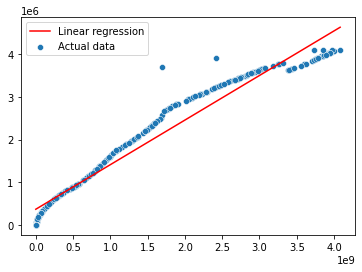

In [ ]:
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), label='Actual data')
sns.lineplot(x=X_test.flatten(), y=y_predicted.flatten(), color='red', label='Linear regression')

Ad 1. Zał o liniowości jest spełnione

Ad 5. Reszty rozkład zbliżony do normalnego:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


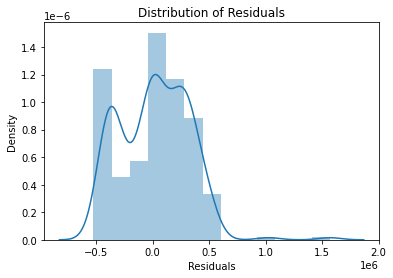

In [ ]:
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [ ]:
# Performing the Anderson-Darling test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value: {}'.format(p_value))

p-value: 1.7075403392904655e-08


Ad 4. Autokorelacja reszt

In [ ]:
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 1.8811182991248303


Ad 3. Homoscedastyczność

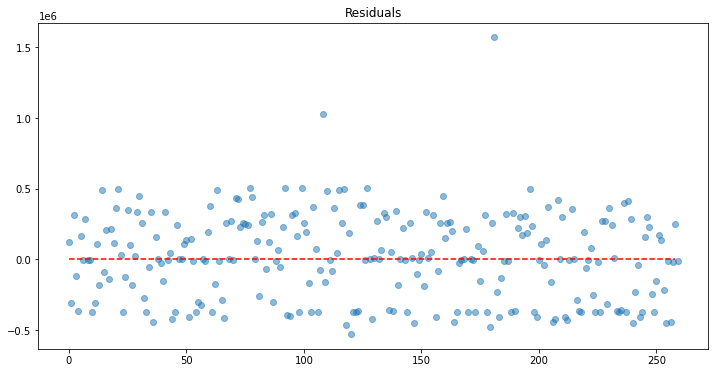

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='red', linestyle='--')
plt.title('Residuals')
plt.show() 

Nie są spełnione następujące założenia:
- Ad 5. o normalności rozkładu reszt

Model ma wysoki współczynnik determinacji oraz spełnia pozostałe założenia, zatem uznaję go za dający dobre predykcje

### Zmienna 'confirmed'

Porównanie modeli linowych dla dwóch zmiennych 'tests' i 'vaccines'

In [ ]:
predicators = ['tests', 'vaccines']

metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
for predicator in predicators:
  X_train, X_test, y_train, y_test = train_test_split(x_agg[predicator].values, x_agg.confirmed.values, test_size=0.3, random_state=0)

  X_train= X_train.reshape(-1, 1)
  X_test = X_test.reshape(-1, 1)
  y_train= y_train.reshape(-1, 1)
  y_test= y_test.reshape(-1, 1)

  # Create linear regression object
  regr = LinearRegression()

  # Train the model using the training sets
  regr.fit(X_train, y_train)

  # Predict values
  y_predicted = regr.predict(X_test)

  # Evaluate
  metrics.at['R^2', predicator] = r2_score(y_test, y_predicted)
  metrics.at['rmse', predicator] = np.sqrt(mean_squared_error(y_test, y_predicted))

In [ ]:
metrics

,tests,vaccines
R^2,9.636414e-01,9.155564e-01
rmse,1.788834e+07,2.726152e+07


Lepszy wynik dla zmiennej 'tests'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_agg['tests'].values, x_agg['confirmed'].values, test_size=0.3, random_state=0)

X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
y_test= y_test.reshape(-1, 1)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predict values
y_predicted = regr.predict(X_test)

metrics.at['R^2', 'model'] = r2_score(y_test, y_predicted)
metrics.at['rmse', 'model'] = np.sqrt(mean_squared_error(y_test, y_predicted))

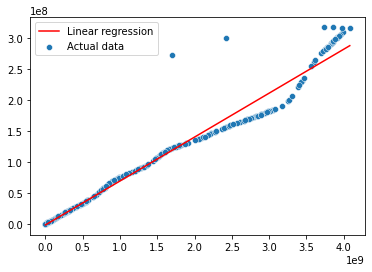

In [ ]:
sns.scatterplot(x=X_test.flatten(), y=y_test.flatten(), label='Actual data')
sns.lineplot(x=X_test.flatten(), y=y_predicted.flatten(), color='red', label='Linear regression')

Ad 5. normalność rozkładu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


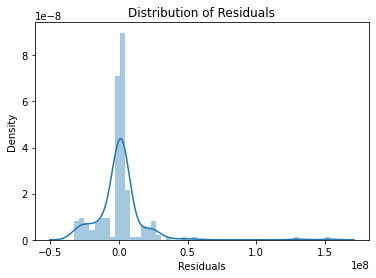

In [ ]:
df_results = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [ ]:
# Performing the Anderson-Darling test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value: {}'.format(p_value))

p-value: 0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


Ad 4. Autokorelacja reszt

In [ ]:
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 1.8593524218392543


Ad 5. Homoscedastyczność

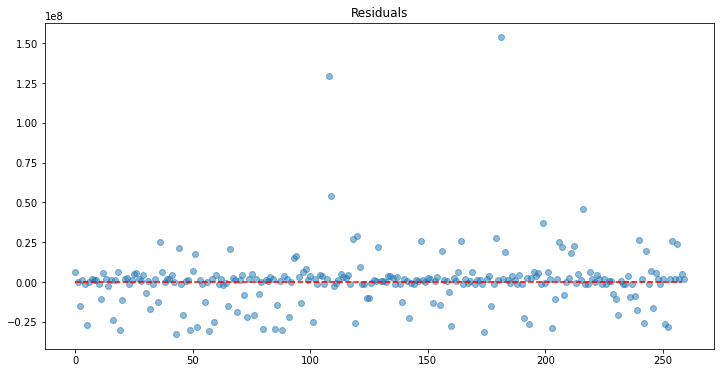

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='red', linestyle='--')
plt.title('Residuals')
plt.show() 

W tym przypadku nie są spełnione dwa założenia:
- Ad 5. o normalności rozkładu
- Ad 3. Homoscedastyczność

Model przy użyciu zmiennej 'tests' będzie dawał gorsze predykcje zmiennej 'confirmed', niż w przypadku przewidywań wartości zmiennej 'deaths'

## Model regresji wielorakiej

Zarówno w przypadku zmiennej 'deaths', jak i zmiennej 'confirmed' skorzystam z zestawu dwóch zmiennych 'tests' i 'vaccines'

In [ ]:
# For each X, calculate VIF and save in dataframe
list1 = ['tests', 'vaccines']
df = pd.DataFrame(x_agg.filter(list1)) 

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,16.573735,tests
1,16.573735,vaccines


### Zmienna 'deaths'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_agg.filter(['tests', 'vaccines']), x_agg.deaths.values, test_size=0.3, random_state=0)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predict values
y_predicted = regr.predict(X_test)

# Evaluate
metrics.at['R^2', predicator] = r2_score(y_test, y_predicted)
metrics.at['rmse', predicator] = np.sqrt(mean_squared_error(y_test, y_predicted))

In [ ]:
metrics

,vaccines
R^2,0.963890
rmse,268653.656288


Ad 5. normalność rozkładu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


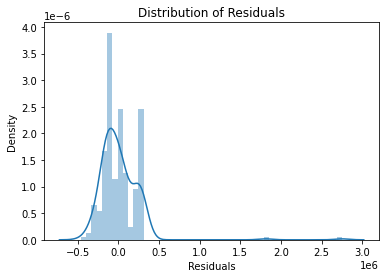

In [ ]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [ ]:
# Performing the Anderson-Darling test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value: {}'.format(p_value))

p-value: 0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


Ad 4. Autokorelacja reszt

In [ ]:
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 2.0334415834315887


Ad 5. Homoscedastyczność

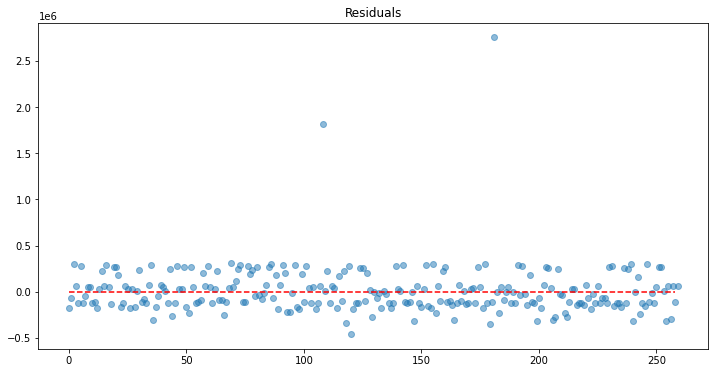

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='red', linestyle='--')
plt.title('Residuals')
plt.show()   

### Zmienna 'confirmed'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_agg.filter(['tests', 'vaccines']), x_agg.confirmed.values, test_size=0.3, random_state=0)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Predict values
y_predicted = regr.predict(X_test)

# Evaluate
metrics.at['R^2', predicator] = r2_score(y_test, y_predicted)
metrics.at['rmse', predicator] = np.sqrt(mean_squared_error(y_test, y_predicted))

In [ ]:
metrics

,vaccines
R^2,9.641356e-01
rmse,1.776636e+07


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


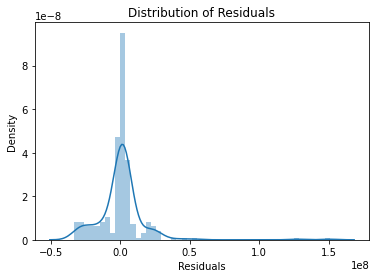

In [ ]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

plt.title('Distribution of Residuals')
sns.distplot(df_results['Residuals'])
plt.show()

In [ ]:
# Performing the Anderson-Darling test on the residuals
p_value = normal_ad(df_results['Residuals'])[1]
print('p-value: {}'.format(p_value))

p-value: 0.0


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


Ad 4. Autokorelacja reszt

In [ ]:
durbinWatson = durbin_watson(df_results['Residuals'])
print('Durbin-Watson:', durbinWatson)

Durbin-Watson: 1.864669163291727


Ad 5. Homoscedastyczność

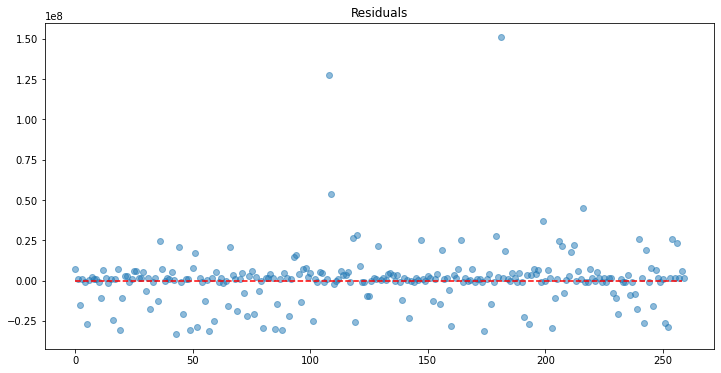

In [ ]:
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='red', linestyle='--')
plt.title('Residuals')
plt.show()

W przypadku obu modeli występuje wysoki współczynnik determinacji, ale nie jest spełnione założenie 
- Ad 5. Normolność reszt rozkładu

W przypadku predykcji zmiennej 'confirmed' dodatkowo nie jest spełnione założenie
- Ad 3. Homoscedastyczność

Zatem model utworzony przy pomocy zmiennych objaśniających 'tests' i 'vaccines' będzie lepiej przewidywał wartość zmiennej 'deaths' niż zmiennej 'confirmed'. Jednak ponieważ nie są spełnione założenia nie korzastałabym z modelu regresji wielorakiej dla powyższych danych.

## SVR

### Zmienna 'deaths'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
X1 = x_agg.loc[:, 'tests'].values 
y1 = x_agg.loc[:, 'deaths'].values 

X_train, X_test, y_train, y_test  = train_test_split(X1, y1, test_size=0.2, random_state=0)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

# Feature scaling
X_sc = StandardScaler()
y_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
y_train = y_sc.fit_transform(y_train)

kernels = ['linear', 'poly', 'rbf']
predictions = pd.DataFrame({'X_test' : X_test.flatten(), 'y_test' : y_test.flatten()})

for kernel in kernels:
  # Create regression object
  regrassor = SVR(kernel = kernel)

  # Train the model using training sets
  regrassor.fit(X_train, y_train)

  # Predict values
  y_pred = regrassor.predict(X_sc.transform(X_test))
  y_pred = y_sc.inverse_transform(y_pred.reshape(-1,1))

  predictions[kernel] = y_pred.flatten()

  # Evaluate
  metrics.at['R^2', kernel] = r2_score(y_test, y_pred)
  metrics.at['rmse', kernel] = np.sqrt(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


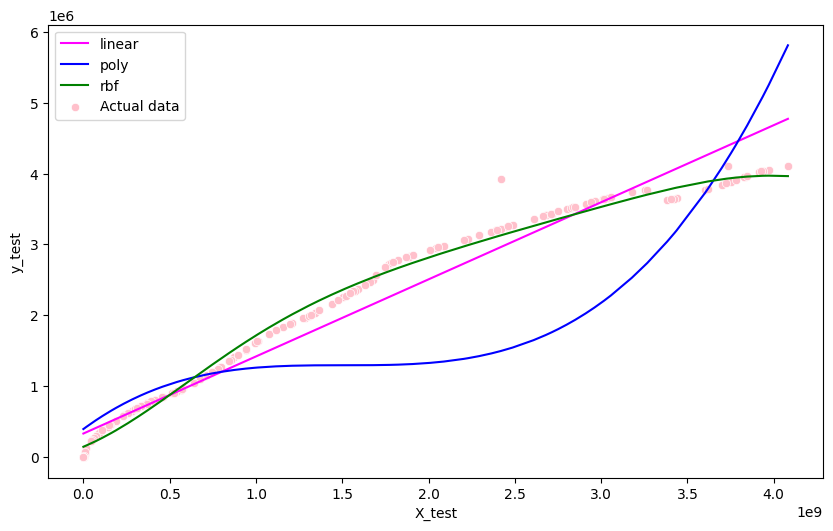

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

fig=plt.figure(figsize=(10,6), dpi= 100)
sns.scatterplot(x=predictions.X_test, y=predictions.y_test, color='pink', label='Actual data')
sns.lineplot(x=predictions.X_test, y=predictions.linear, color='magenta', label='linear')
sns.lineplot(x=predictions.X_test, y=predictions.poly, color='blue', label='poly')
sns.lineplot(x=predictions.X_test, y=predictions.rbf, color='green', label='rbf')
fig.show()

In [ ]:
metrics

,linear,poly,rbf
R^2,0.956864,0.548157,0.992110
rmse,284496.462349,920764.633670,121673.311687


Najlepsze dopasowanie dla kernela 'linear' oraz 'rbf'

### Zmienna 'confirmed'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

In [ ]:
X1 = x_agg.loc[:, 'tests'].values 
y1 = x_agg.loc[:, 'confirmed'].values 

X_train, X_test, y_train, y_test  = train_test_split(X1, y1, test_size=0.2, random_state=0)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

# Feature scaling
X_sc = StandardScaler()
y_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
y_train = y_sc.fit_transform(y_train)

kernels = ['linear', 'poly', 'rbf']
predictions = pd.DataFrame({'X_test' : X_test.flatten(), 'y_test' : y_test.flatten()})

for kernel in kernels:
  # Create regression object
  regrassor = SVR(kernel = kernel)

  # Train the model using training sets
  regrassor.fit(X_train, y_train)

  # Predict values
  y_pred = regrassor.predict(X_sc.transform(X_test))
  y_pred = y_sc.inverse_transform(y_pred.reshape(-1,1))

  predictions[kernel] = y_pred.flatten()

  # Evaluate
  metrics.at['R^2', kernel] = r2_score(y_test, y_pred)
  metrics.at['rmse', kernel] = np.sqrt(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


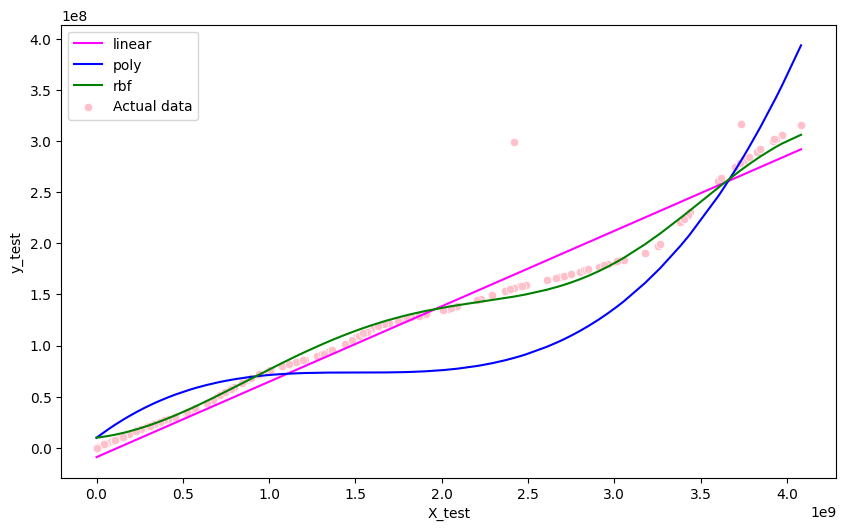

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

fig=plt.figure(figsize=(10,6), dpi= 100)
sns.scatterplot(x=predictions.X_test, y=predictions.y_test, color='pink', label='Actual data')
sns.lineplot(x=predictions.X_test, y=predictions.linear, color='magenta', label='linear')
sns.lineplot(x=predictions.X_test, y=predictions.poly, color='blue', label='poly')
sns.lineplot(x=predictions.X_test, y=predictions.rbf, color='green', label='rbf')
fig.show()

In [ ]:
metrics

,linear,poly,rbf
R^2,9.638888e-01,8.202401e-01,9.771889e-01
rmse,1.682291e+07,3.753415e+07,1.337069e+07


Analogiczne rezultaty dla zmiennej 'confirmed'

## Drzewa regresyjne

### Zmienna 'deaths'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

possible_predicator_sets = [['tests'], 
                            ['vaccines'],
                            ['tests', 'vaccines']]

iter = 0

for feature_set in possible_predicator_sets:
  x1 = x_agg[feature_set].values
  y1 = x_agg.deaths.values
  X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

  model = DecisionTreeRegressor(random_state=44)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  # Evaluate
  metrics.at['R^2', iter] = r2_score(y_test, y_pred)
  metrics.at['rmse', iter] = np.sqrt(mean_squared_error(y_test, y_pred))

  iter = iter+1

In [ ]:
metrics

,0,1,2
R^2,0.995378,0.999176,0.996344
rmse,96117.073953,40595.086444,85483.934393


In [ ]:
x1 = x_agg['vaccines'].values
y1 = x_agg.deaths.values
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

model = DecisionTreeRegressor(random_state=44)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate
metrics.at['R^2', 'regression_tree_model'] = r2_score(y_test, y_pred)
metrics.at['rmse', 'regression_tree_model'] = np.sqrt(mean_squared_error(y_test, y_pred))

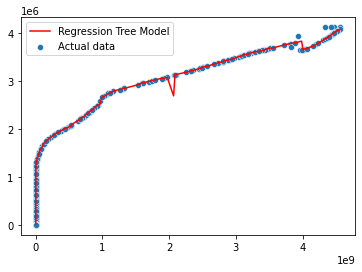

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

sns.scatterplot(x=X_test, y=y_test, label='Actual data')
sns.lineplot(x=X_test, y=y_pred, color='red', label='Regression Tree Model')

### Zmienna 'confirmed'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

possible_predicator_sets = [['tests'], 
                            ['vaccines'],
                            ['tests', 'vaccines']]

iter = 0

for feature_set in possible_predicator_sets:
  x1 = x_agg[feature_set].values
  y1 = x_agg.confirmed.values
  X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

  model = DecisionTreeRegressor(random_state=44)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  # Evaluate
  metrics.at['R^2', iter] = r2_score(y_test, y_pred)
  metrics.at['rmse', iter] = np.sqrt(mean_squared_error(y_test, y_pred))

  iter = iter+1

In [ ]:
metrics

,0,1,2
R^2,9.738559e-01,9.928551e-01,9.929763e-01
rmse,1.516888e+07,7.929823e+06,7.862297e+06


W przypadku predykcji zmiennej 'deaths' najlepsze dopasowanie dla zmiennej objaśniającej 'vaccines', natomiast do przewidywań wartości zmiennej 'confirmed' najlepszy rezultat dla zestawu zmiennych ['tests', 'vaccines']

## Losowy las regresyjny

### Zmienna 'deaths'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

X1 = x_agg.loc[:, 'tests'].values
y1 = x_agg.loc[:, 'deaths'].values

X_train, X_test, y_train, y_test  = train_test_split(X1, y1, test_size=0.2, random_state=0)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

RF = RandomForestRegressor()

# Train the model using training sets
RF.fit(X_train, y_train)

# Predict values
y_pred = RF.predict(X_test)

# Evaluate
metrics.at['R^2', 'RandomForest'] = r2_score(y_test, y_pred)
metrics.at['rmse', 'RandomForest'] = np.sqrt(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [ ]:
metrics

,RandomForest
R^2,0.996105
rmse,85487.007012


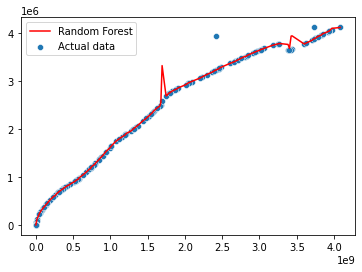

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

sns.scatterplot(x=X_test, y=y_test, label='Actual data')
sns.lineplot(x=X_test, y=y_pred, color='red', label='Random Forest')

Mimo przeważającego bardzo dobrego dopasowania modelu oraz bardzo wysokiego współczynnika R^2, model ma miejscami dziwne 'skoki'.

### Zmienna 'confirmed'

In [ ]:
metrics = pd.DataFrame().set_axis(labels=['R^2', 'rmse'], axis=0)

X1 = x_agg.loc[:, 'tests'].values
y1 = x_agg.loc[:, 'confirmed'].values

X_train, X_test, y_train, y_test  = train_test_split(X1, y1, test_size=0.2, random_state=0)

X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

RF = RandomForestRegressor()

# Train the model using training sets
RF.fit(X_train, y_train)

# Predict values
y_pred = RF.predict(X_test)

# Evaluate
metrics.at['R^2', 'RandomForest'] = r2_score(y_test, y_pred)
metrics.at['rmse', 'RandomForest'] = np.sqrt(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [ ]:
metrics

,RandomForest
R^2,9.720698e-01
rmse,1.479507e+07


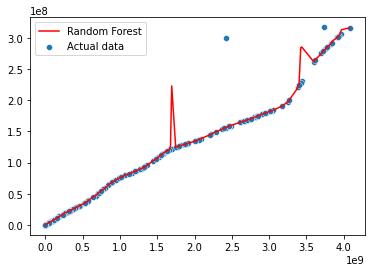

In [ ]:
X_test = X_test.flatten()
y_test = y_test.flatten()
y_pred = y_pred.flatten()

sns.scatterplot(x=X_test, y=y_test, label='Actual data')
sns.lineplot(x=X_test, y=y_pred, color='red', label='Random Forest')

# Podsumowanie

### Dyskusja

**Cel**

Celem pracy była lokalna oraz globalna predykcja (a) liczby zgonów oraz (b) liczby nowych zachorowań na Covid 19.

**Hipotezy**

Przed przystąpieniem do badań podejrzewałam, że liczba zachorowań jak i zgonów nie będzie rosła liniowo w czasie, ale raczej wielomianowo lub wykładniczo.

Kolejne przypuszczenia wiązały się z czynnikami, które podejrzewałam o duży wpływ na (a) i (b):

- polityka państw dot. izolacji, ograniczeń przemieszczania itp.
- szczepienia przeciw wirusowi

**Metody**

Do predykcji użyłam nastęoujących metod:
- Model prostej regresji liniowej
- Model regresji wielorakiej
- Metoda wektorów nośnych (SVR)
- Metoda drzew regresyjnych
- Metoda losowych lasów regresyjnych

**Obserwacje dot. objaśnianych zmiennych**

Po wykonanych badaniach doszłam do następujących wniosków:
- zgodnie z przypuszczeniami, w większości zastosowanych modeli, do przewidywania zmiennej 'confirmed' (liczba potwierdzonych przypadków) największy wpływ na predykcję miała zmienna 'vaccines' (liczba rozdystrybuowanych szczepionek)
- dodatkowo jakość modeli do predykcji 'confirmed' polepszało dodanie, tam gdzie to było możliwe, zmiennej 'stringency_index' (polityka surowości państw w zakresie zapobiegania rozprzestrzeniania wirusa)

A zatem w przypadku predykcji zmiennej 'confirmed' jest to zgodne z przypuszczeniami.

- do predykcji zmiennej 'deaths' w większości przypadków wykorzystałam zmienną 'tests' (sumaryczna liczba wykonanych testów), gdyż to ona dawała najlepsze rezultaty (R^2 oraz rmse).
- W niektórych przypadkach dodatkowo pomocna była zmienna 'stringency_index'

W przypadku predykcji 'deaths' zmienną informującą o surowości polityki państwa dot. rozprzestrzeniania wirusa (restrykcje) dość łatwo wytłumaczyć - im surowsze restrykcje dot. izolacji, przemieszczania, zamknięcia placówek itp., tym mniejsza liczba zgonów.

Natomiast zmienna 'tests' jest trudniejsza do interpretacji. Być może jest to związane z różnymi przypadłościami, na które dana osoba cierpiała przed i w trakcie przechodzenia choroby Covid-19 (Dopiero po wykonaniu wykonaniu testu okazywało się co było prawdziwą przyczyną zgonu?? - wtedy liczba zgonów jest związana z liczbą wykonanych testów)

**Dodatkowe dot. wykonanych modeli**

- Bardziej miarodajne i wiargodne rezultaty dała lokalna analiza zjawiska. Jest to spowodowane utratą dużej części informacji podczas czyszczenia danych do analizy globalnej.

- Złe wyniki dały prosty model regresji oraz regresja wieloraka. Charakteryzowały się słabym dopasowaniem do danych

- Przetrenowaniem charakteryzowały się zarówno model oprty na drzewach regresji i na lesie regresyjnym

- Najlepiej z danymi poradził sobie model SVR z parametrem kernel='rbf'






### Wnioski

1. Czy algorytmy predykcyjne oparte na
regresji są dobrym rozwiązaniem dla tego problemu? Tak/Nie

- Jedynym algorytmem, który wg mnie poradził sobie dobrze z predykcją jest SVR.

2. Dlaczego

- Inne modele były za mało lub za bardzo dopasowane

3. Czy można rozpatrywać ten problem globalnie?

- dane są bardzo niejednorodne, z tego względu ich globalna analiza jest bardzo trudna.
- Ponadto, różne państwa mają różny dostęp do szczepionek oraz różną politykę (ograniczenia/restrykcje), a to wlaśnie na tych zmiennych skupiałam się w analizie. Dodatkowy wpływ może mieć na przykład gęstość zaludnienia - tego i wielu innych czynników także nie brałam pod uwagę w analizie.
